<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
#!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Importing tensorflow library
import tensorflow as tf
from tensorflow import keras

# Importing backend
from keras import backend

# importing different functions to build models
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization


import time

from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report

import random

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")


## Loading the dataset

In [3]:
# Mount the drive for Google Coalb
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read the Bank churners csv file
churn = pd.read_csv('/content/drive/MyDrive/AIML_BankChurn/Churn.csv')

## Data Overview

In [5]:
# let's create a copy of the data
df = churn.copy()

### Shape of the dataset

In [6]:
df.shape #returns dimension of the dataframe

(10000, 14)

The Dataframe has 10,000 rows and 14 features/columns

### First and Last rows of Database

In [7]:
# Returns first 5 rows of the dataframe
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Returns last 5 rows of the dataframe
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Check the datatypes of dataset

In [9]:
df.info()  # returns the summary of dataframe including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Out of 14 columns - 11 features are continuous and 3 features are objects
Total memory used is 1.1+ MB

### Statistical Summary of Database

In [10]:
df.describe(include='all').T   # returns stats for all columns

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


In [11]:
df.describe(include=["object"]).T # returns stats for all non numerical columns

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


**Observations**

Row Number and CustomerId are unique for every customer, hence we may. not need them for our prediction in this classification problem

surname is same for few customers but its unique and not needed for prediction

**Categorical Variables**

Geography has only 3 unique values with most common is France contributing ~50% of customers

Gender has only 2 unique values with most common as male

~ 50% of customers have credit cards

~ 50% of customers are active members

Exited is our target variable - more than 50% customers stayed with the bank

**Numerical Variables**

Age is right skewed as mean is ~39 and median is ~37  with max as 92 and min as 18

Credit score is normally distributed as mean and median are same (~650) with max of 850 and min of 350

Tenure is a normally distributed variable with minimum value of 0, maximum value of 10 and mean and median value of 5

Balance is right skewed with minimum value of 0, maximum value of ~250K and mean value of ~97K and median of 76K

EstimatedSalary is normally distributed with minimum value of 11K, maximum value of little less than ~200K and mean and median value of ~100K.








### Missing Values Check

In [12]:
df.isna().values.any() # Checks if any value is missing

False

In [13]:
df.isnull().sum() # returns sum of missing values

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


No Missing Values in the dataframe

###  Duplicate Values Check

In [14]:
# Lets check for any duplicate values , and if there is any we will remove them
df[df.duplicated()].count() # check for any duplicate values

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


No Duplicate values

### Unique Values

In [15]:
df.nunique() # returns unique values for each column

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


RowNumber and CustomerId won't be required for model building as they are unique to each customer. Even Surname can be excluded as well

In [16]:
# Returns unique vales for columns
collist = ['Surname','Geography','Gender','Tenure','NumOfProducts','HasCrCard', 'IsActiveMember']
for i in collist:
    print("Unique values in", i, "are :")
    print(df[i].unique())
    print("*" * 50)

Unique values in Surname are :
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
**************************************************
Unique values in Geography are :
['France' 'Spain' 'Germany']
**************************************************
Unique values in Gender are :
['Female' 'Male']
**************************************************
Unique values in Tenure are :
[ 2  1  8  7  4  6  3 10  5  9  0]
**************************************************
Unique values in NumOfProducts are :
[1 3 2 4]
**************************************************
Unique values in HasCrCard are :
[1 0]
**************************************************
Unique values in IsActiveMember are :
[1 0]
**************************************************


## Exploratory Data Analysis

### Data PreProcessing for EDA

#### Dropping columns

In [17]:
# CustomerId  RowNumber is unique for each customer and might not add value
# Drop Surname too
df.drop(columns = ['CustomerId', 'RowNumber','Surname'], inplace = True)

#### Object to Category

In [18]:
## Lets convert the columns with an 'object' datatype into categorical variables
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer

In [19]:
df.info()  # returns the summary of dataframe including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


Memory is reduced to ~720KB

All Objects types are converted to Categories

### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [20]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, hue, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue = hue,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [22]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [23]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### Age

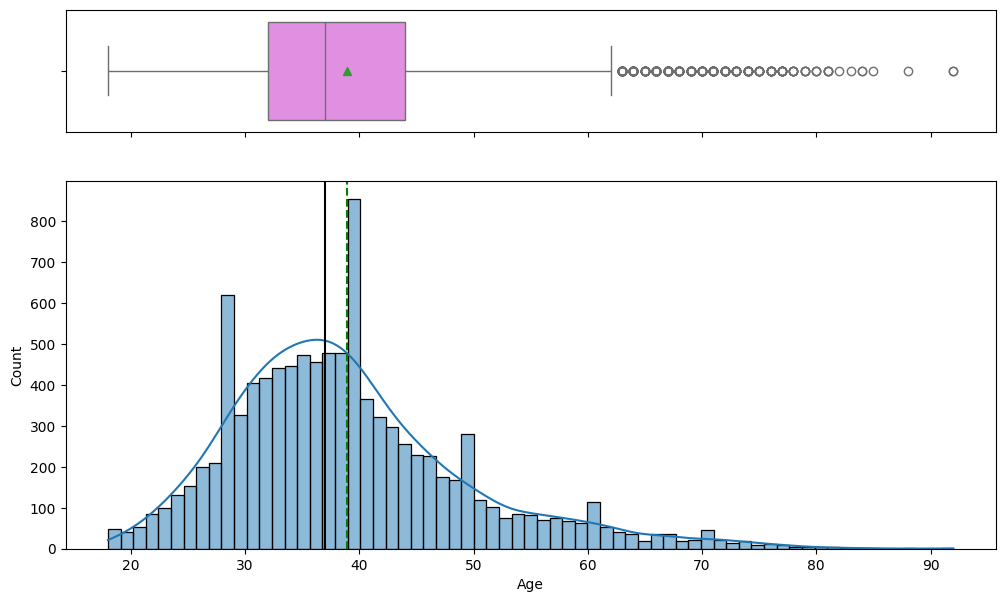

In [24]:
histogram_boxplot(df, "Age", kde=True)  # Plots histogram and boxplot for 'Age'

Age is right skewed with a number of outliers beyond the right whisker

Outliers in the age looks like real data and no need to remove them

Range of Age is from 18 to 92

#### Balance

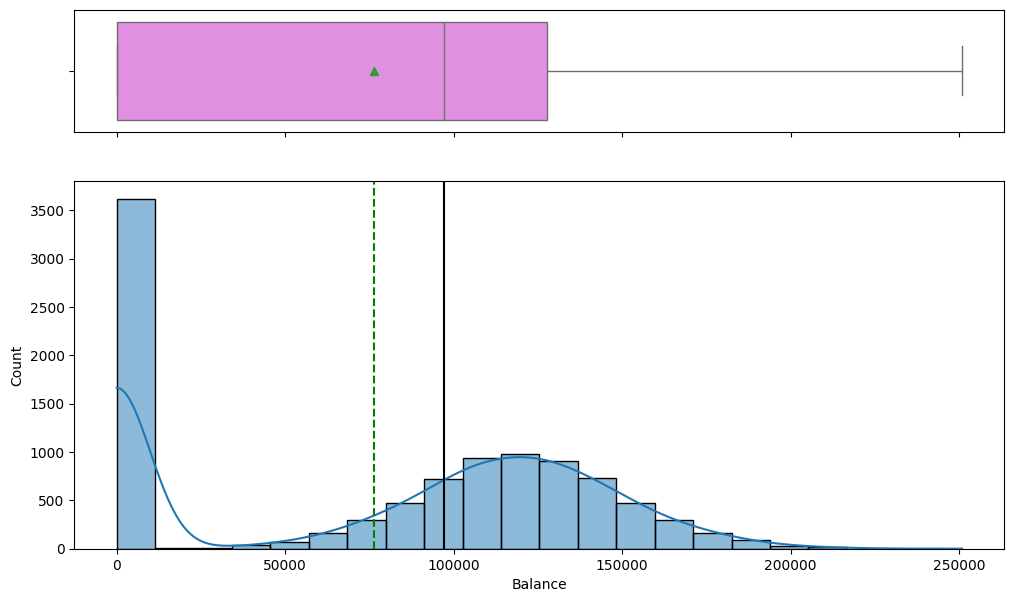

In [25]:
histogram_boxplot(df, "Balance", kde=True)  # Plots histogram and boxplot for 'Balance'

In [26]:
df[df['Balance'] > 10000].count()

,0
CreditScore,6382
Geography,6382
Gender,6382
Age,6382
Tenure,6382
Balance,6382
NumOfProducts,6382
HasCrCard,6382
IsActiveMember,6382
EstimatedSalary,6382


In [27]:
df[df['Balance'] > 150000].count()

,0
CreditScore,969
Geography,969
Gender,969
Age,969
Tenure,969
Balance,969
NumOfProducts,969
HasCrCard,969
IsActiveMember,969
EstimatedSalary,969


In [28]:
df[df['Balance'] == 0].count()

,0
CreditScore,3617
Geography,3617
Gender,3617
Age,3617
Tenure,3617
Balance,3617
NumOfProducts,3617
HasCrCard,3617
IsActiveMember,3617
EstimatedSalary,3617


Balance is right skewed with no outliers

More than 60% cutomers have balance of less than 10K and 36% customers exist with zero balance

Less than 1% customers have balance of more than 150K

#### Estimated Salary

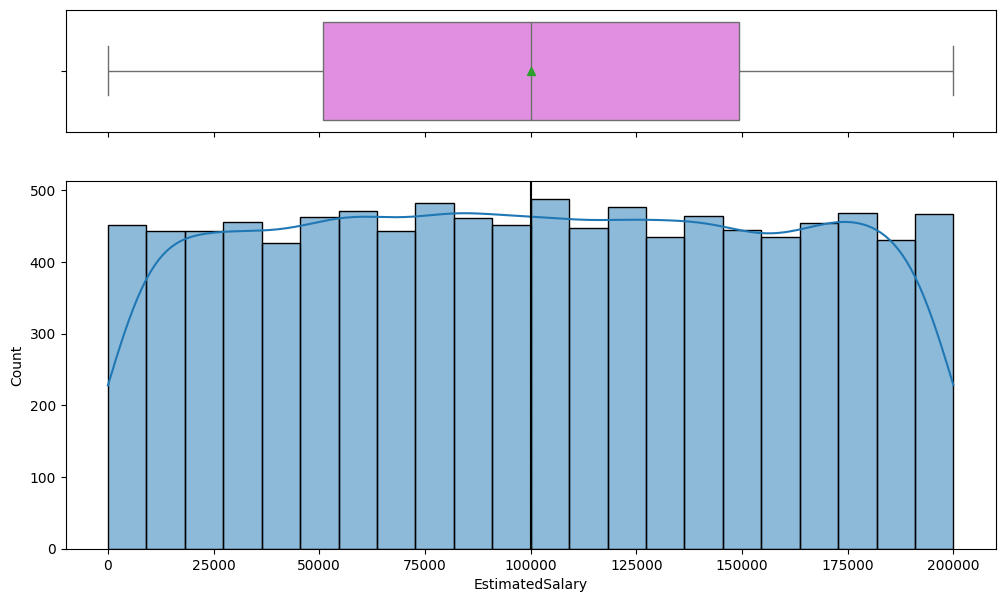

In [29]:
histogram_boxplot(df, "EstimatedSalary", kde=True)  # Plots histogram and boxplot for 'Estimated Salary'

Estimated Salary is normal distribution

Mean and median are same ~100K


#### Credit Score

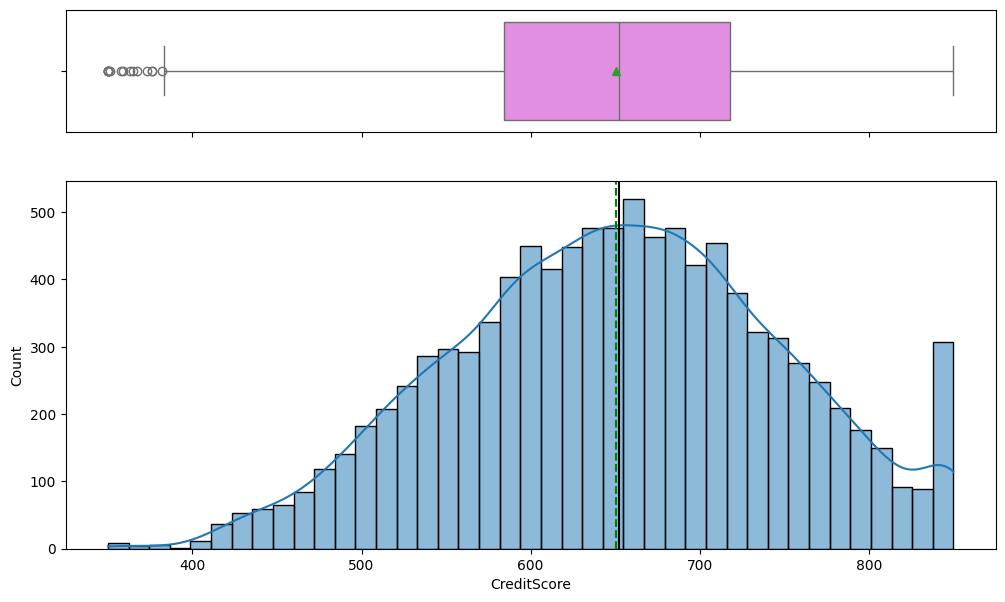

In [30]:
histogram_boxplot(df, "CreditScore", kde=True)  # Plots histogram and boxplot for 'Credit Score'

Mean and Median are almost same

Pretty close to normal distribution

Few Outliers before left whisker - These outliers seems pretty consistent with the data hence need not to be eliminated



#### Tenure

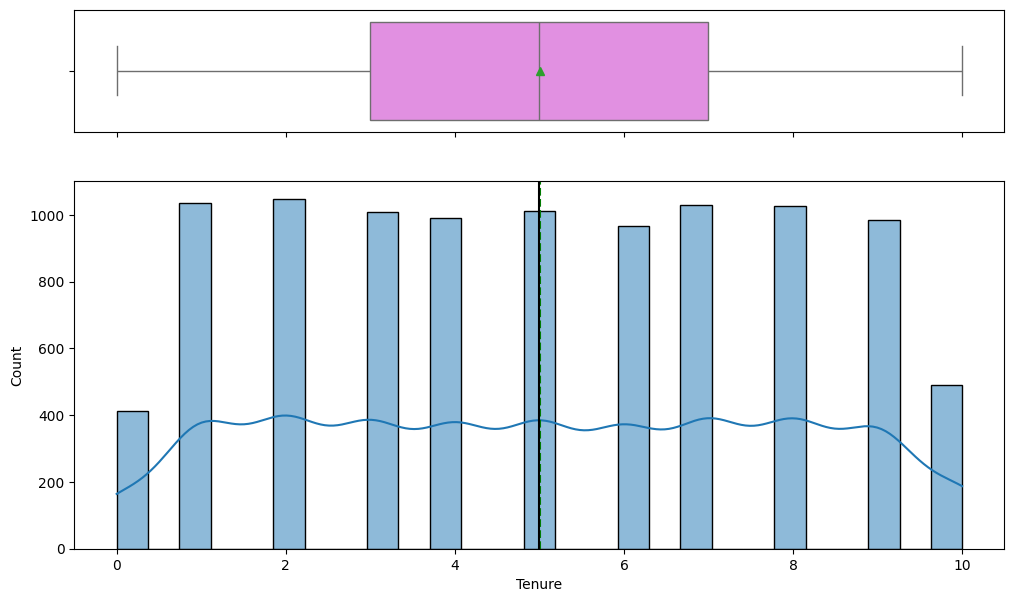

In [31]:
histogram_boxplot(df, "Tenure", kde=True)  # Plots histogram and boxplot for 'Tenure'

Tenure is normally distributed with no outliers


#### Geography

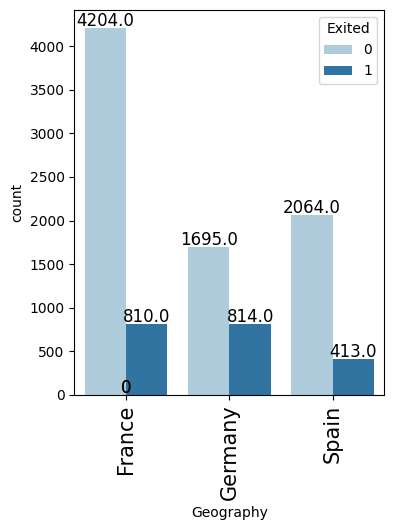

In [32]:
labeled_barplot(df, "Geography", 'Exited') # Plots barplot for 'Geography'

Majority of customers are from France. Almost 50% of customers are from France and 25% from Germany and Spain.

16% of cutomers from France and Spain are Exited wheras 32% customers are Exited from Germany




#### Gender

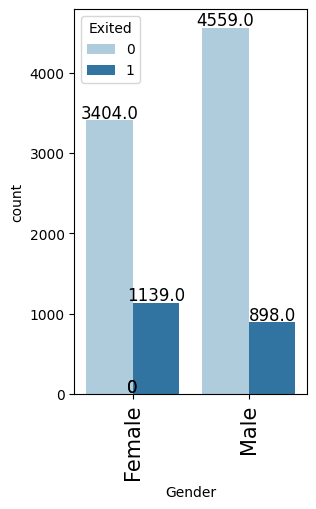

In [33]:
labeled_barplot(df, "Gender", 'Exited') # Plots barplot for 'Gender'

55% of customers are males and only 45% customers are females


The Proportion of Female Customers churning (25%) is more than of male customers (16%)

#### Has Credit Card

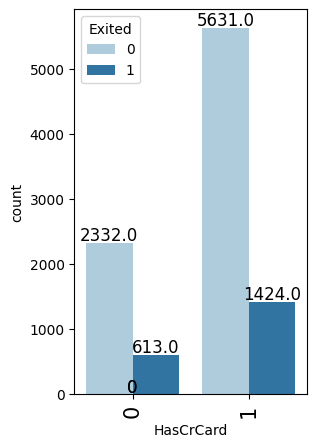

In [34]:
labeled_barplot(df, "HasCrCard", 'Exited') # Plots barplot for 'Has Credit Card'

Majority Customers that are churned has credit card

Approx 70% customers have creidt cards

#### Exited

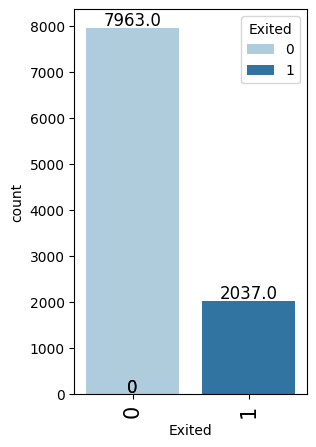

In [35]:
labeled_barplot(df, "Exited", 'Exited') # Plots barplot for 'Exited'

Approx. 20% of the customers exit the bank wheras 80% customers did not exit.

Target variable classes is unbalanced

#### Is Active

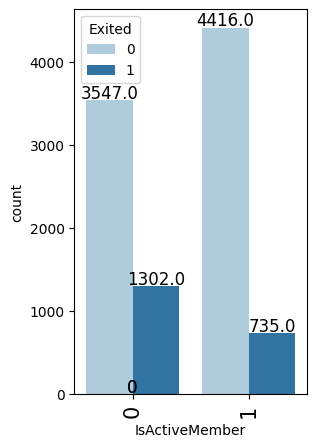

In [36]:
labeled_barplot(df, "IsActiveMember", 'Exited') # Plots barplot for 'Is Member Active'

Approx half of customers are active and other half is inactive

Inactive customers have a greater churn almost 26% than of active customers which is 14%

#### Tenure

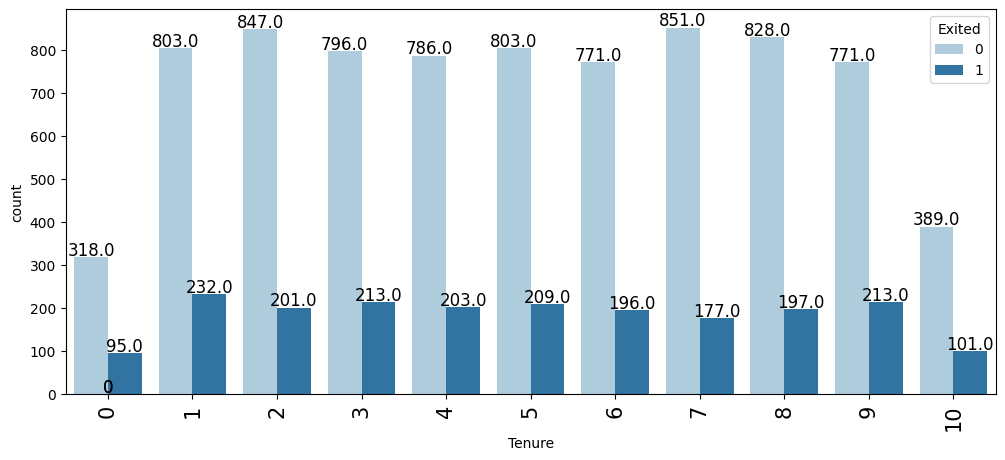

In [37]:
labeled_barplot(df, "Tenure", 'Exited') # Plots barplot for 'Tenure'

Customers with lowest(0) or highest(10) tenure are more likely to churn compared to others

#### Num Of Products

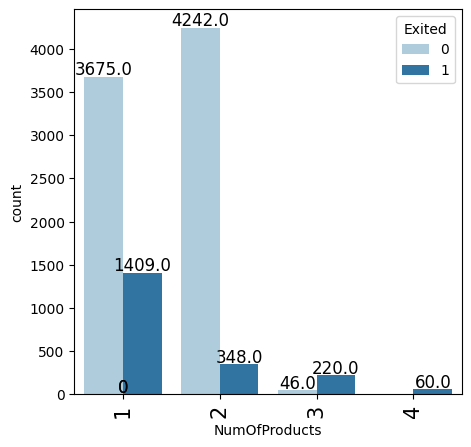

In [38]:
labeled_barplot(df, "NumOfProducts", 'Exited') # Plots barplot for 'Number of Products'

50% of customers uses only 1 product and 46% customers uses 2 or 2 products





### Bivariate Analysis

#### Gender vs Exited

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


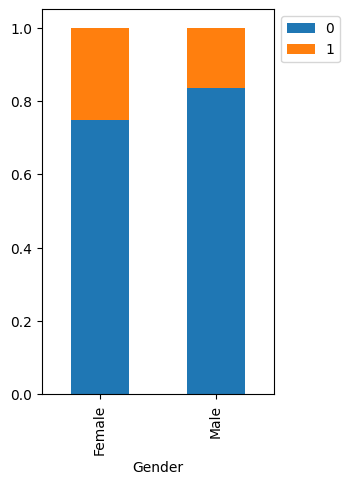

In [39]:
stacked_barplot(df, "Gender", "Exited") #Plots bar plot for Exited vs Gender

Most of exited customers are females,

#### Geography vs Exited

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


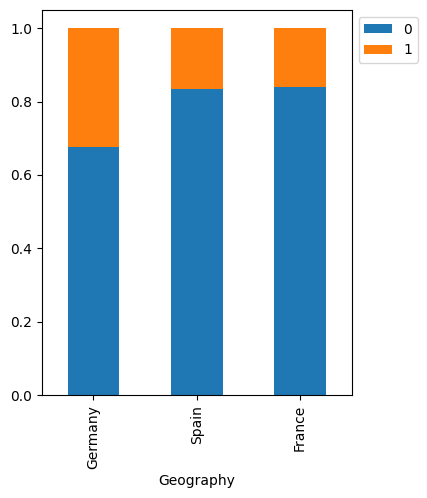

In [40]:
stacked_barplot(df, "Geography", "Exited") #Plots bar plot for Exited vs Geography

The highest ratio of exited customers are from Germany.

Almost the same ratio for exited customers from Spain and France.

#### Is Active Member vs Exited

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


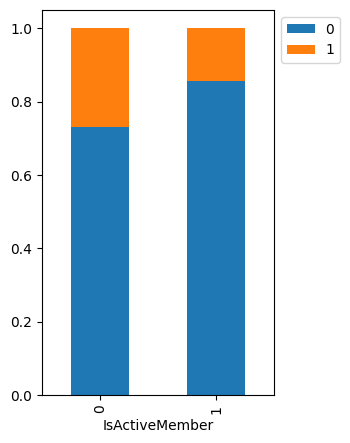

In [41]:
stacked_barplot(df, "IsActiveMember", "Exited") #Plots bar plot for IsActiveMember vs Exited

A low ratio of exited customers is observed for active customers compared to inactive customers.

#### Exited vs Num Of Products

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


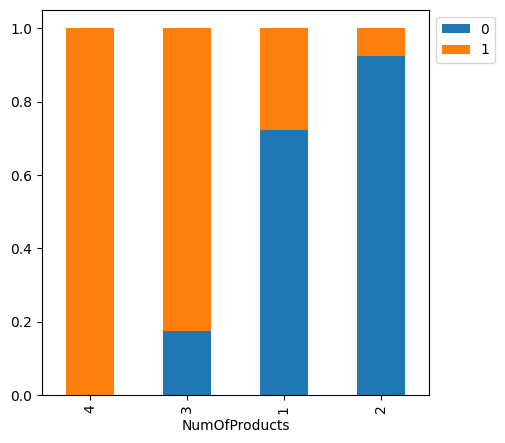

In [42]:
stacked_barplot(df, "NumOfProducts", "Exited") ## Plots bar plot for Number of products vs Exited

All customers with 4 products exited from the bank

A very high ratio of customers who uses 3 products also exited.

The ratio of exited customers using 1 product is very less.

#### Has Credit Card vs Exited

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


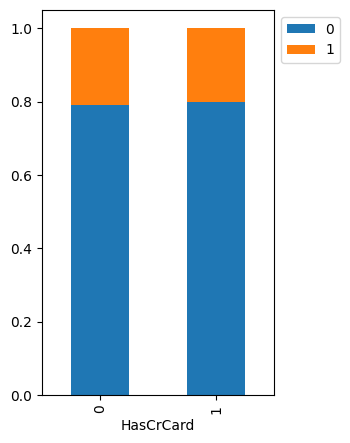

In [43]:
stacked_barplot(df, "HasCrCard", "Exited") #Plots bar plot for Has Credit Card vs Exited

The ratio of exited customers is approximately the same for  customers with and without credit cards

#### Exited vs Credit Score

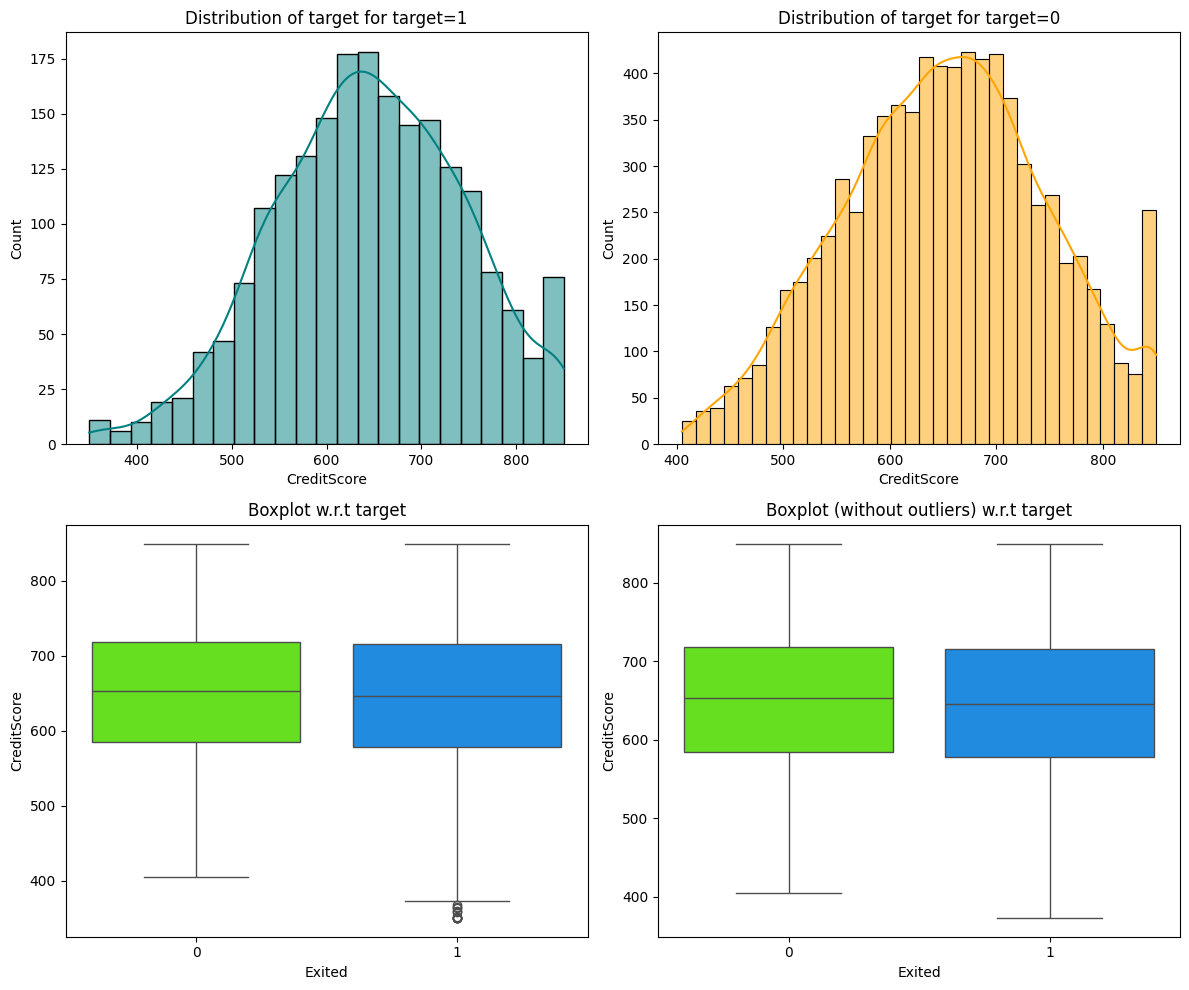

In [44]:
distribution_plot_wrt_target(df, "CreditScore", "Exited") ## Plots distribution_plot for Credit Score vs Exited

Credit Score is normally distributes for Exited variable

Outlliers do not affect any distribution

#### Exited vs Age

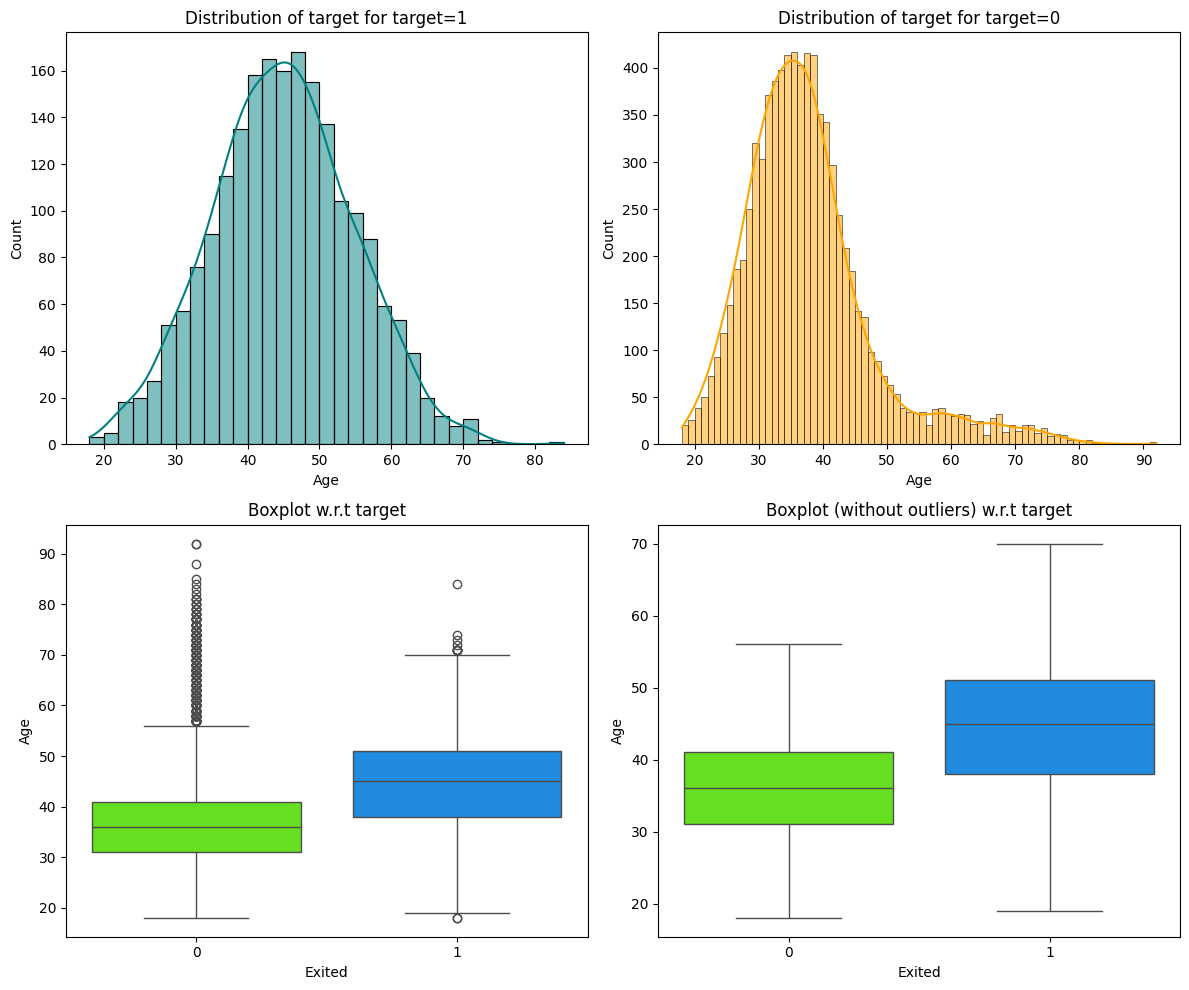

In [45]:


distribution_plot_wrt_target(df, "Age", "Exited") ## Plots distribution_plot for Age vs Exited

Age shows higher median value for exited customers as compared to the median value of the customers who stayed with the bank.

The customers who stays with the bank shows more outliers.

#### Exited vs Tenure

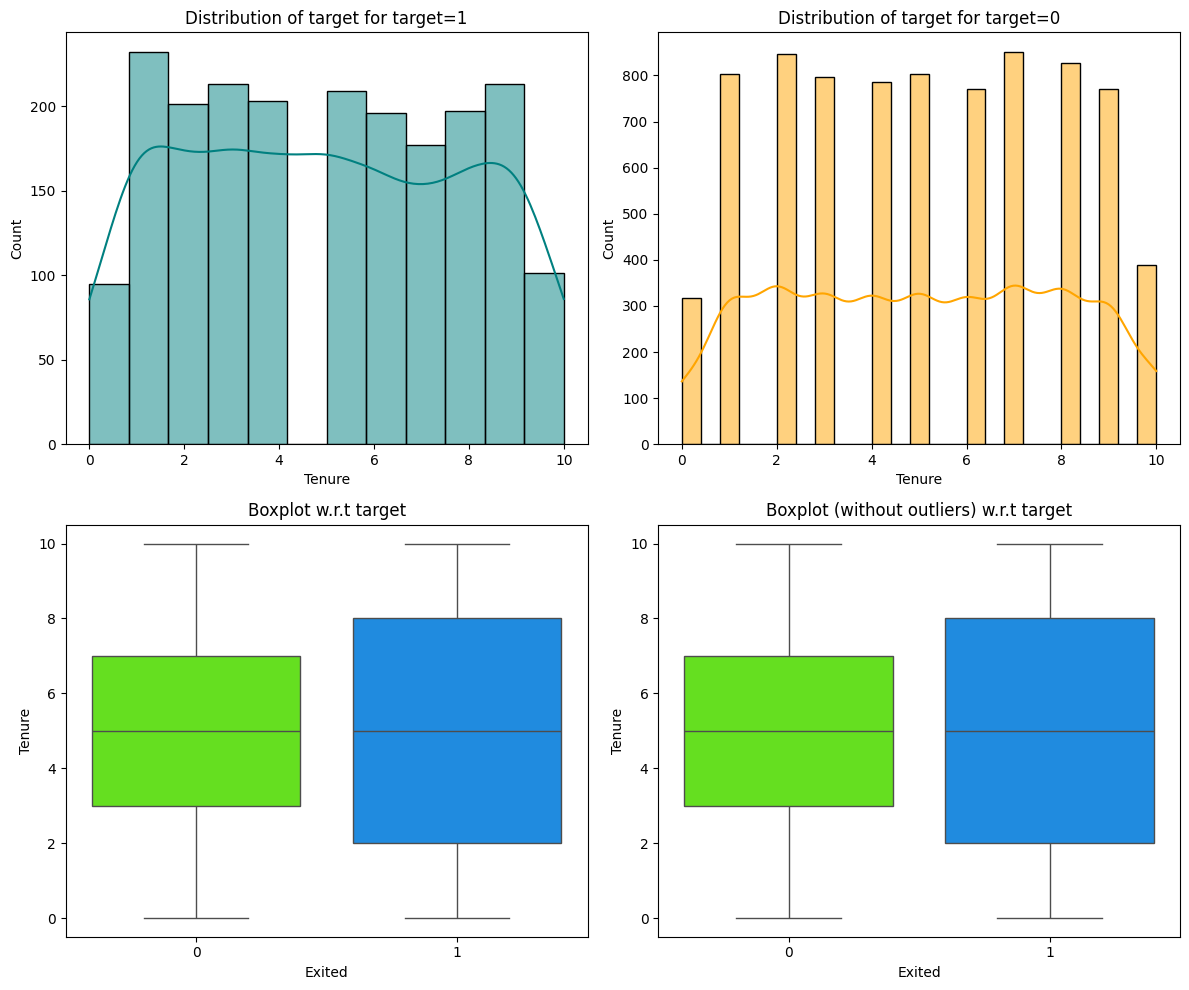

In [46]:
distribution_plot_wrt_target(df, "Tenure", "Exited") ## Plots distribution_plot for Tenure vs Exited

Tenure is with normal distribution

Median for both Exited and Non Exited customers is same

#### Exited vs Balance

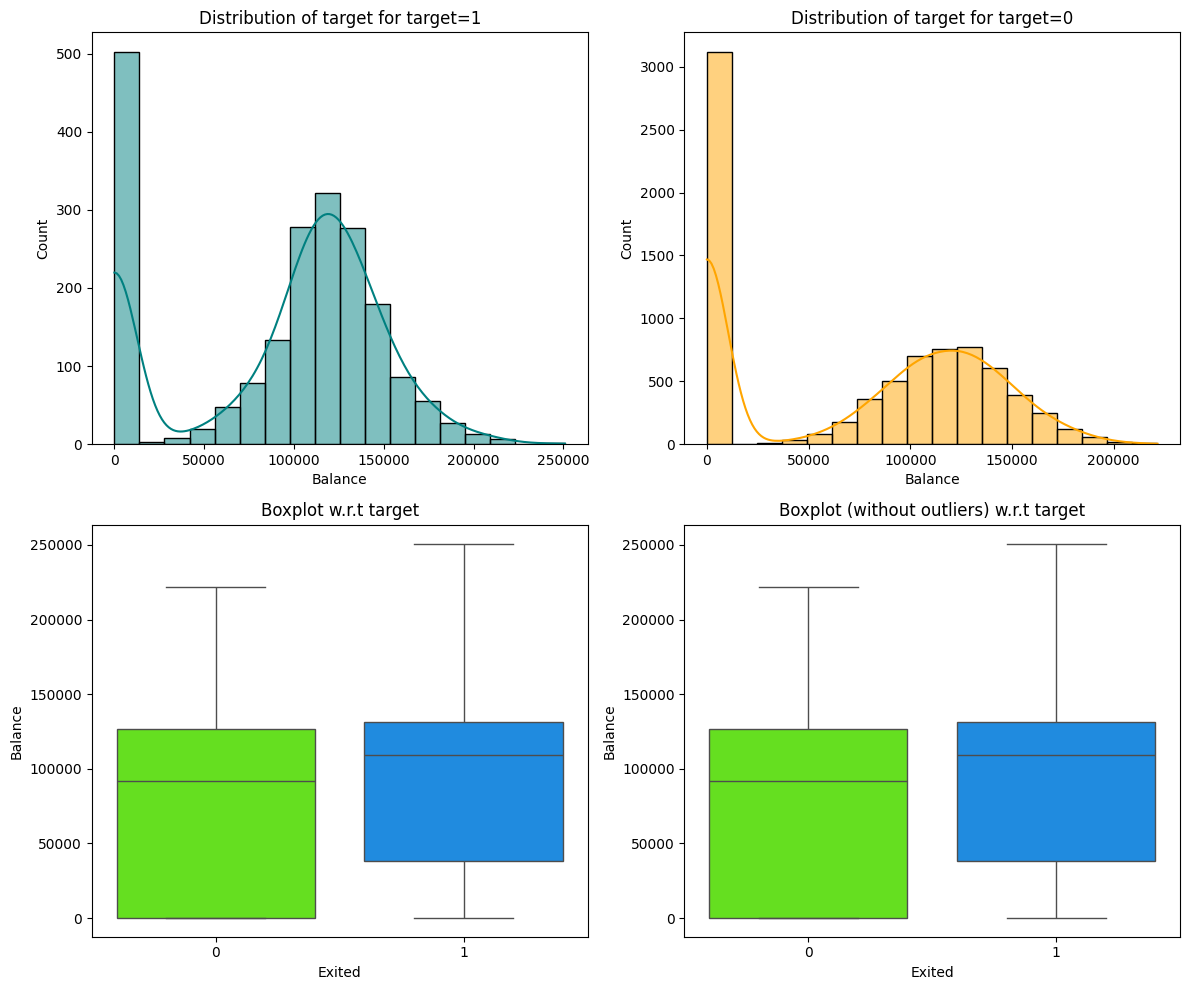

In [47]:
distribution_plot_wrt_target(df, "Balance", "Exited") ## Plots distribution_plot for balance vs Exited

Most customers having balance 0 have exited the bank.

The median of the customers exited the bank is also slightly higher.

#### Exited vs Estimated Salary

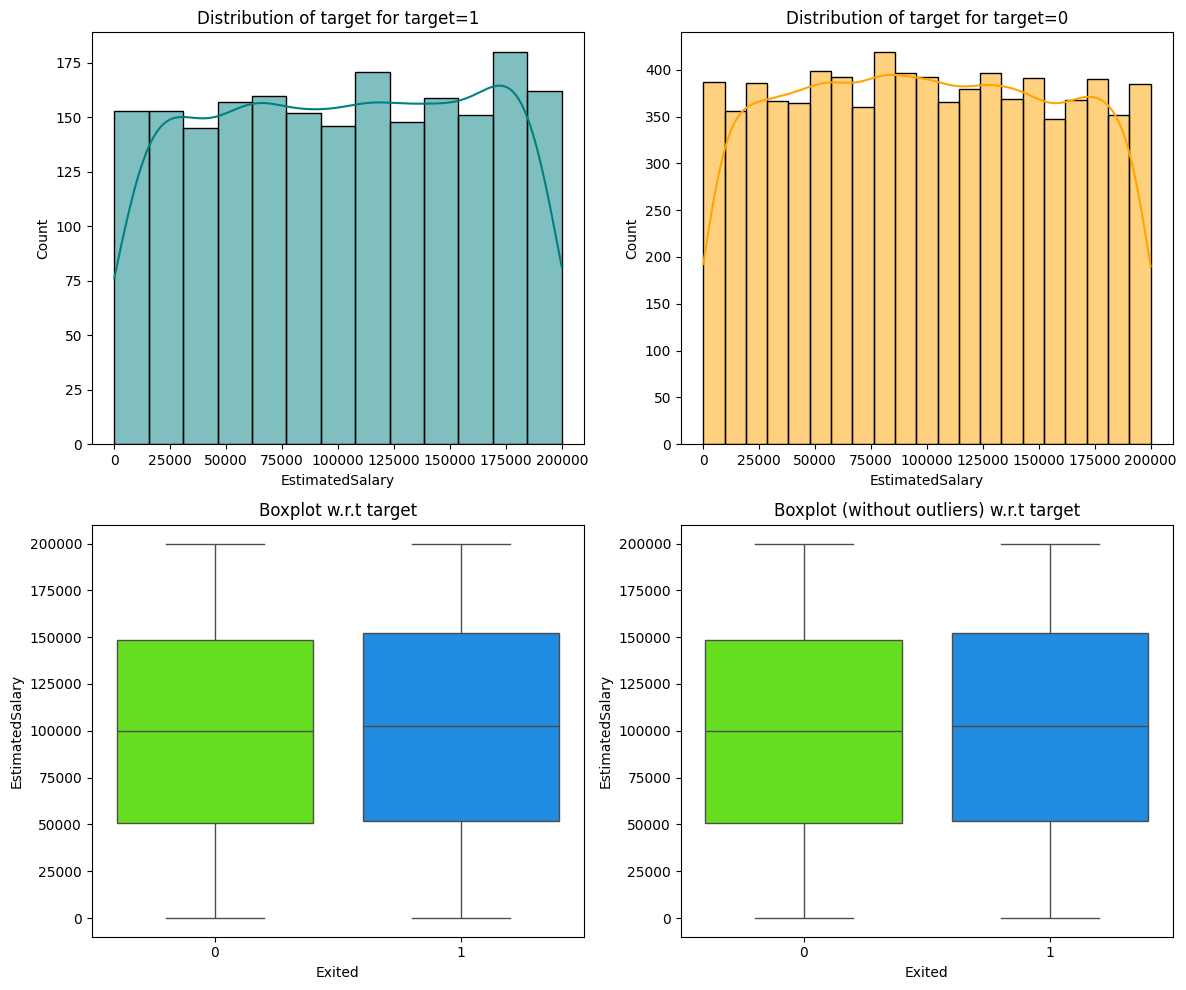

In [48]:
distribution_plot_wrt_target(df, "EstimatedSalary", "Exited") ## Plots distribution_plot for Estimated Salary vs Exited

Estimated Salary is showing a very similar uniform distribution for both classes.

#### Heat map & Pair Plot



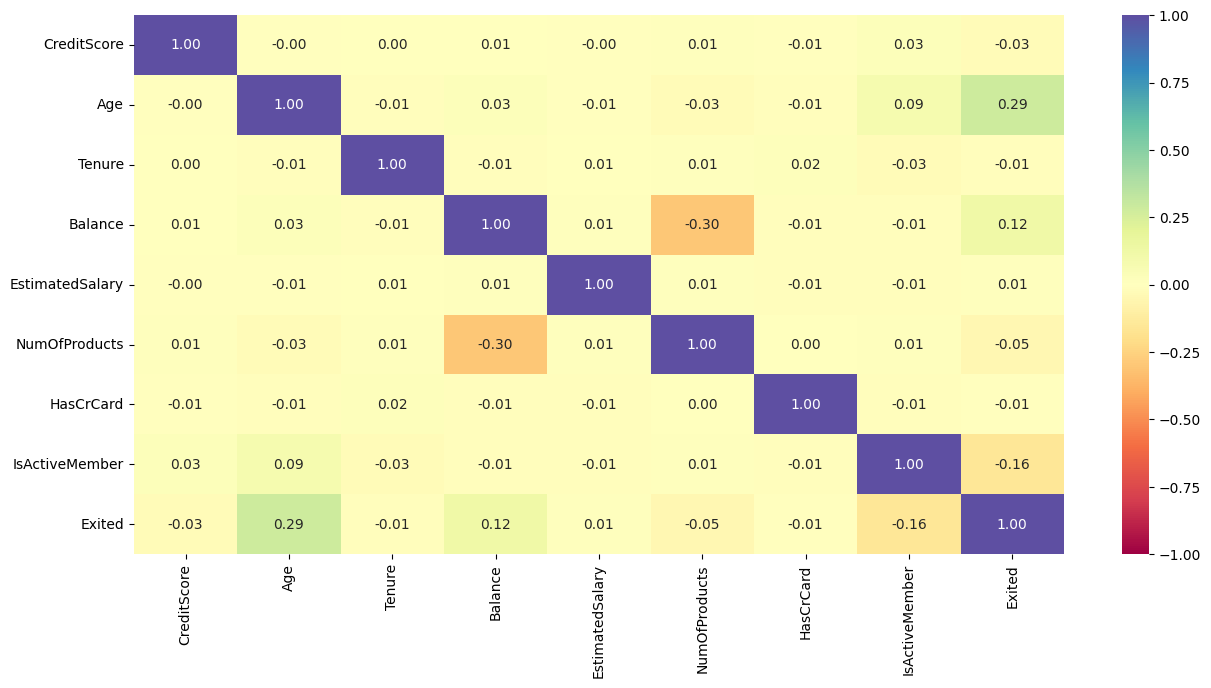

In [49]:
# Plots heat map for all numerical values
plt.figure(figsize=(15, 7))
num_heat_cols = ["CreditScore","Age","Tenure","Balance","EstimatedSalary",'NumOfProducts','HasCrCard','IsActiveMember',"Exited"]
sns.heatmap(df[num_heat_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") #Returns the heatmap of the data
plt.show()

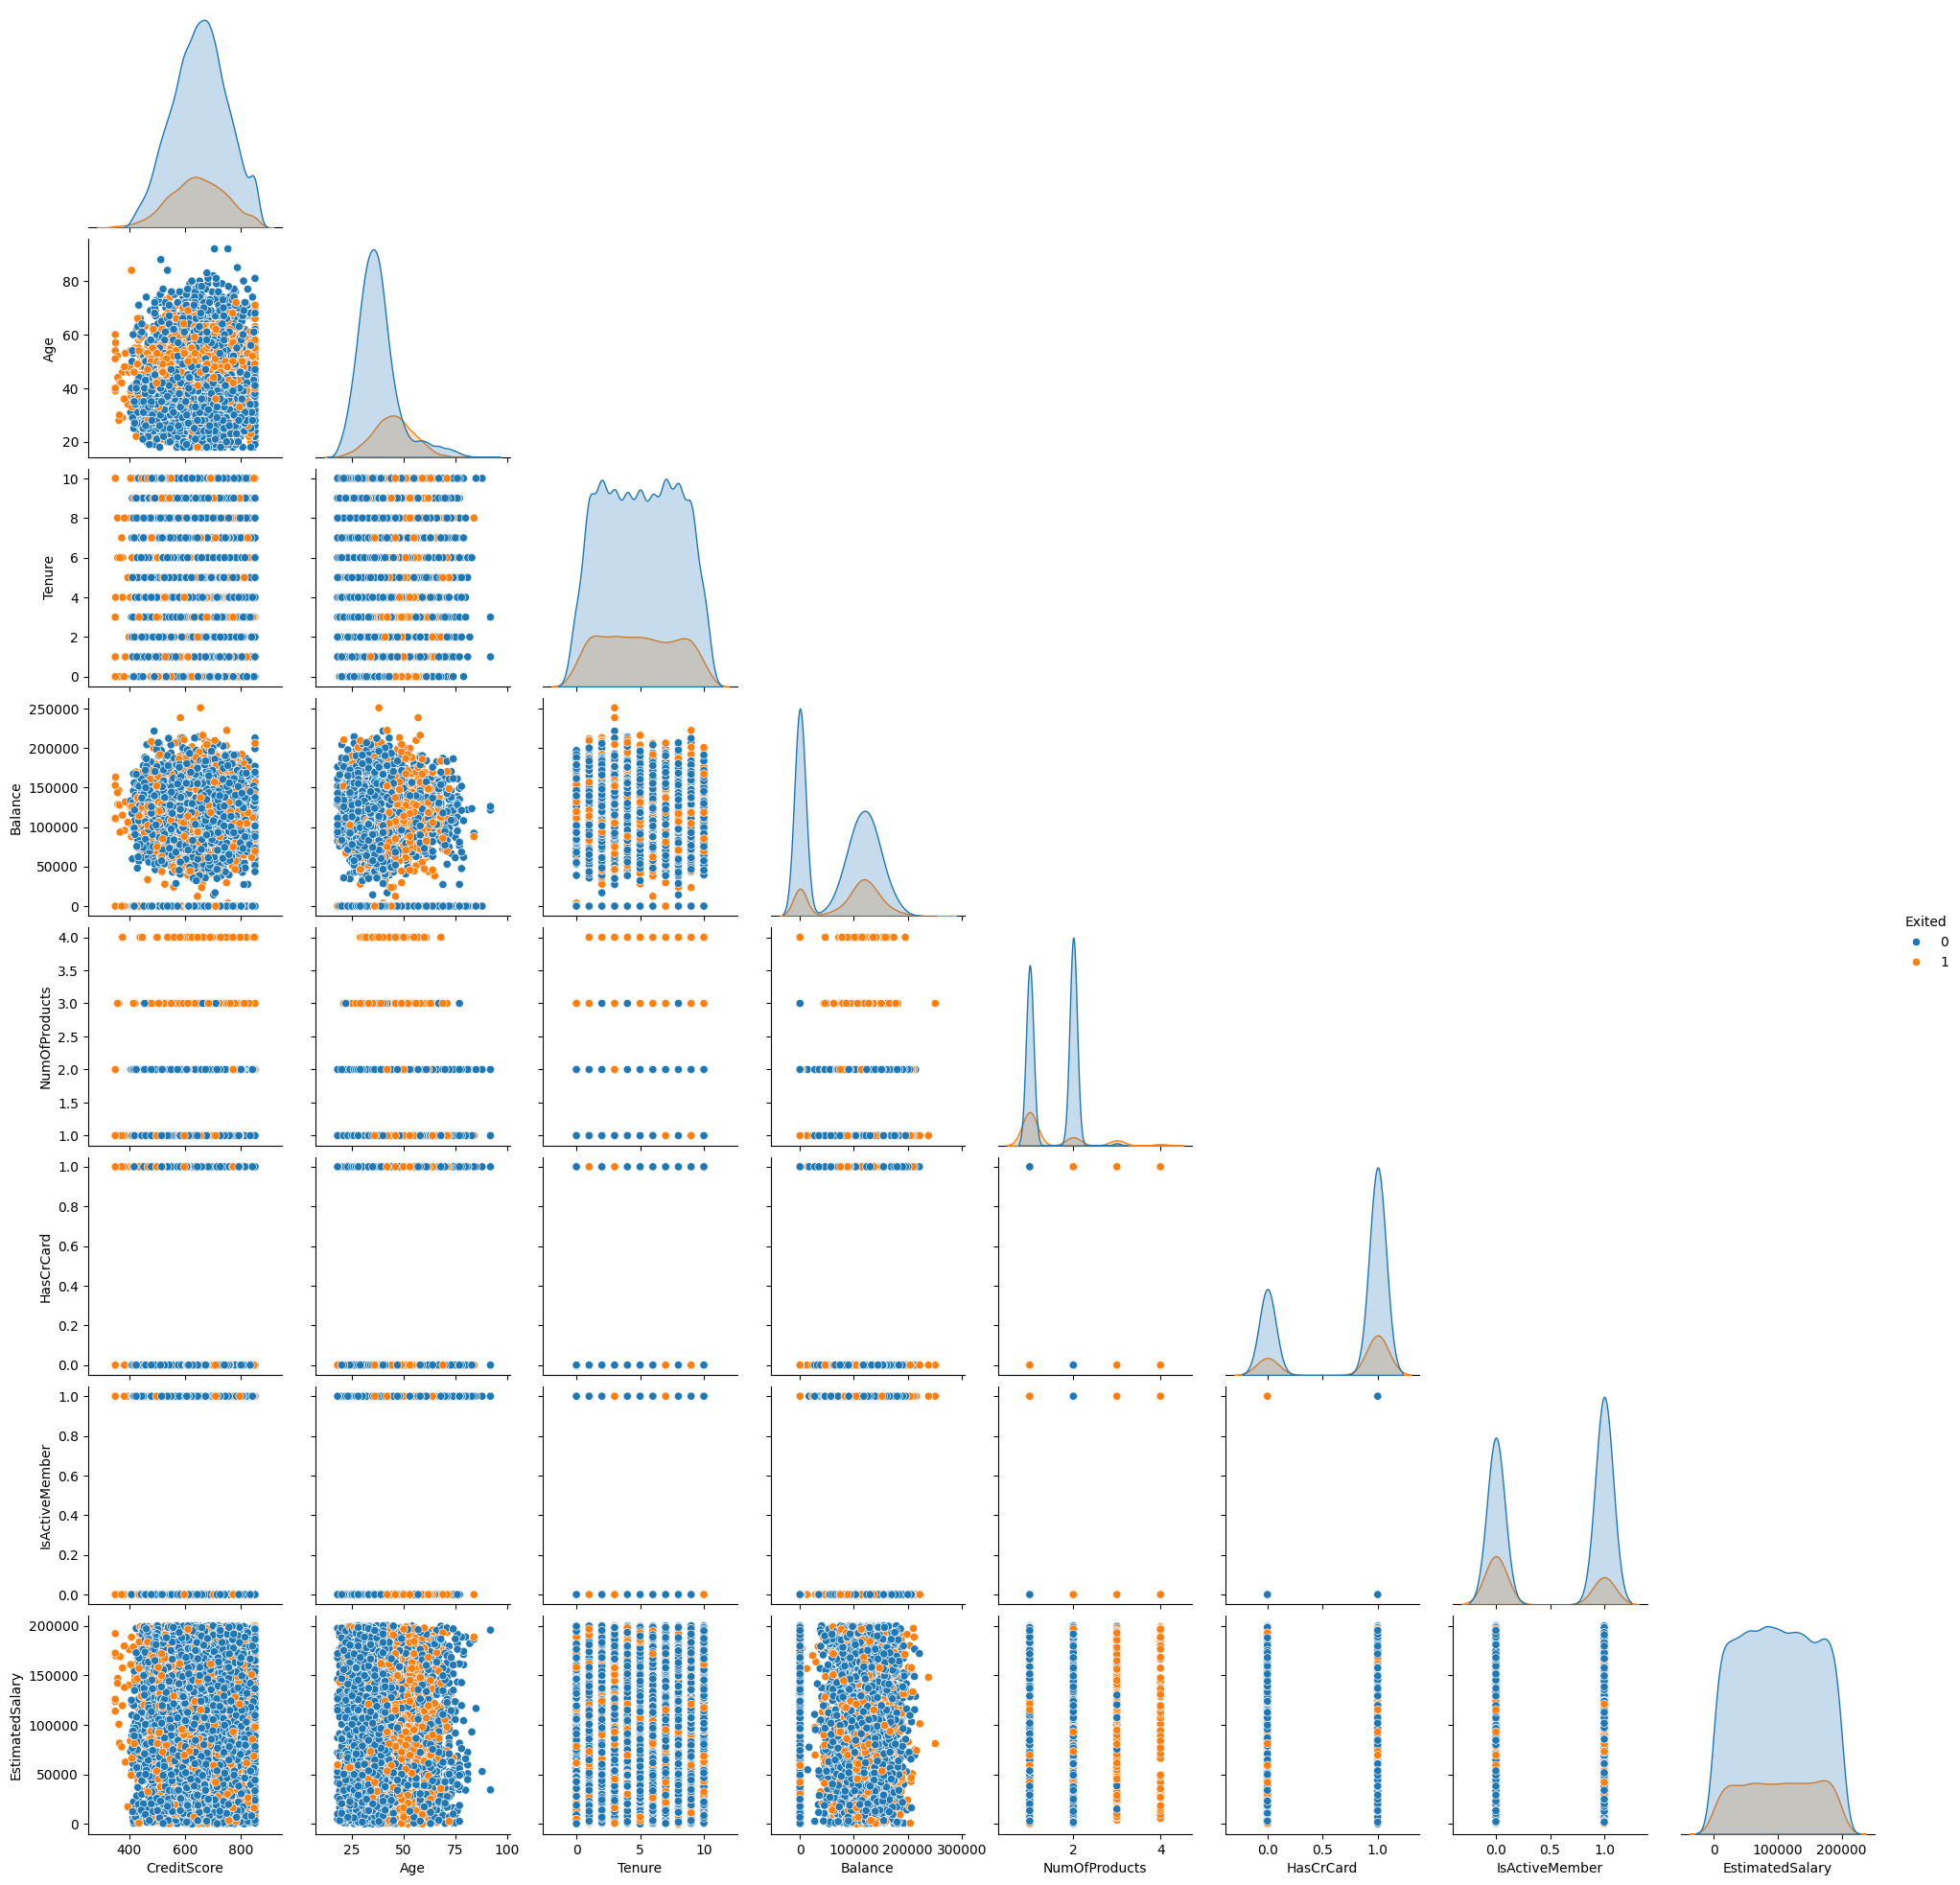

In [50]:
#plt.figure(figsize=(15, 7))
sns.pairplot(data=df, hue="Exited", corner=True);

The heatmap do not show any corelation

As per pair plot Exited and non Exited Customers are present in all clusters. The non Existed customers are pretty less hence, an imbalanced dataset


## Data Preprocessing

### Create a data copy

In [51]:
dfcopy = churn.copy() # creates a copy from original data source before Pre Processing of Data for EDA

In [52]:
dfcopy.info()  #returns the summary of dataframe including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [53]:
dfcopy.head() # returns top 5 rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Dropping Columns

In [54]:
# CustomerId  RowNumber is unique for each customer and might not add value
dfcopy.drop(columns = ['CustomerId', 'RowNumber','Surname'], inplace = True)

### Splitting into Dependent and independent variables

In [55]:
## Separating Independent and Dependent Columns
X = dfcopy.drop(['Exited'],axis=1)
y = dfcopy['Exited']

In [56]:
X.columns  # Displays columns for X dataframe

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

### Missing Value Imputation

In [57]:
#Calculating the total number of nan values for each columns.
X.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


There are no missing values in the dataframe

### Dummy Variable Creation

In [58]:
X = pd.get_dummies(X,columns=['Geography','Gender'],drop_first=True)

In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Geography_Germany  10000 non-null  bool   
 9   Geography_Spain    10000 non-null  bool   
 10  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(6)
memory usage: 654.4 KB


### Train Validation Test Split

In [60]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 11) (2000, 11) (2000, 11)


In [61]:
# Print s the number of rows in each set
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6000
Number of rows in validation data = 2000
Number of rows in test data = 2000


In [62]:
# Prints the percentage for set for Existing and Attrited customer
print("Training: \n", y_train.value_counts(normalize=True))
print("\n\nValidation: \n", y_val.value_counts(normalize=True))
print("\n\nTest: \n", y_test.value_counts(normalize=True))

Training: 
 Exited
0    0.796333
1    0.203667
Name: proportion, dtype: float64


Validation: 
 Exited
0    0.796
1    0.204
Name: proportion, dtype: float64


Test: 
 Exited
0    0.7965
1    0.2035
Name: proportion, dtype: float64


### Data Normalization

In [63]:
# creating an instance of the standard scaler
cols_list = ["CreditScore","Age","Balance","EstimatedSalary","Tenure","NumOfProducts"]
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)    ## Complete the code to specify the columns to normalize
X_test = sc.transform(X_test)    ## Complete the code to specify the columns to normalize

### Over Sampling of Data

In [64]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)

X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of X_train: {}".format(X_train_over.shape))
print("After UpSampling, the shape of y-train: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1222
Before UpSampling, counts of label 'No': 4778 

After UpSampling, counts of label 'Yes': 4778
After UpSampling, counts of label 'No': 4778 

After UpSampling, the shape of X_train: (9556, 11)
After UpSampling, the shape of y-train: (9556,) 



### Under Sampling of Data

In [65]:
# applting the random under sampler using sampling strategy 0.5
random_us = RandomUnderSampler(random_state=1, sampling_strategy = 0.5)
X_train_un, y_train_un = random_us.fit_resample(X_train, y_train)

print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))


print("After UpSampling, the shape of X_train: {}".format(X_train_un.shape))
print("After UpSampling, the shape of y-train: {} \n".format(y_train_un.shape))

After UpSampling, counts of label 'Yes': 1222
After UpSampling, counts of label 'No': 2444 

After UpSampling, the shape of X_train: (3666, 11)
After UpSampling, the shape of y-train: (3666,) 



### Utility Functions

In [66]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legen

In [67]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [68]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

## Model Building

#### Model Evaluation Criterion

Case Predictions:

Case 1 - Predicting a Customer will Exit a bank but in reality he actually doesn't Exit - Loss of Resource (FP)

Case 2 - Predicting a Customer will not Exit a bank but in reality customer does Exit - Loss of Opportunity (FN)

Which case is more important

The purpose of bank is to retain customers, hence  Case 2 is more important

How to reduce this loss of Oppurtinity or False Negative(FN)

The Bank would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

-


In [69]:
# Store Recall values in a dataframe for train and valid model.
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])


In [70]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 25
batch_size = 50

#### Model 0 - **NN with SGD**

- Let's start with a neural network consisting of
  - two hidden layers with 64 and 32 neurons respectively
  - activation function for hidden layers - ReLU.
  - Output layer with 1 node
  - Output Activation Function as Sigmoid
  - Output loss function as Binary Cross Entropy
  - SGD as the optimizer

##### **Neural Network with SGD Optimizer**

In [71]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [72]:
#Initializing the neural network
model0 = Sequential()
# Adding the first hidden layer with 64 neurons and relu as activation function
model0.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
# Adding the second hidden layer with 32 neurons and relu as activation function
model0.add(Dense(32, activation='relu'))
# Adding the output layer with 1 neurons and Sigmoid as activation function
model0.add(Dense(1, activation = 'sigmoid'))

In [73]:
model0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
#use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD()

In [75]:
## compile the model with binary cross entropy as loss function and accuracy as the metric.
model0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [76]:
# Fitting the model
start = time.time()
history0 = model0.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6890 - loss: 0.6110 - val_accuracy: 0.7960 - val_loss: 0.4996
Epoch 2/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7995 - loss: 0.4886 - val_accuracy: 0.7960 - val_loss: 0.4699
Epoch 3/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7996 - loss: 0.4640 - val_accuracy: 0.7995 - val_loss: 0.4534
Epoch 4/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8014 - loss: 0.4492 - val_accuracy: 0.8050 - val_loss: 0.4423
Epoch 5/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8081 - loss: 0.4389 - val_accuracy: 0.8060 - val_loss: 0.4344
Epoch 6/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8122 - loss: 0.4312 - val_accuracy: 0.8080 - val_loss: 0.4287
Epoch 7/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8178 - loss: 0.4254 - val_accuracy: 0.8135 - val_loss: 0.4243
Epoch 8/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8169 - loss: 0.4207 - val_accuracy: 0.

In [77]:
print("Time taken in seconds ",end-start)

Time taken in seconds  10.466041564941406


##### **Loss Function**

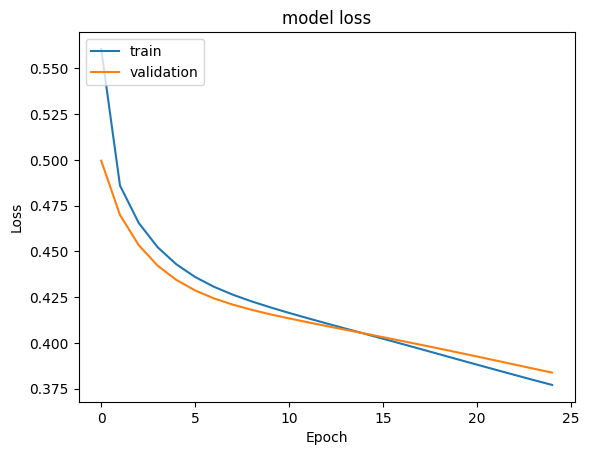

In [78]:
#Plotting Train Loss vs Validation Loss
plt.plot(history0.history['loss'])
plt.plot(history0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

##### **Performance**

In [79]:
model0_train_perf = model_performance_classification(model0, X_train, y_train)
model0_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.849,0.849,0.839514,0.82735


In [80]:
model0_valid_perf = model_performance_classification(model0, X_val, y_val)
model0_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.837,0.837,0.822401,0.812512


In [81]:
#Predicting the results using best as a threshold for train set
y_train_pred = model0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [82]:
#Predicting the results using best as a threshold for Val set
y_val_pred = model0.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [83]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

##### **Confusion Matrix**

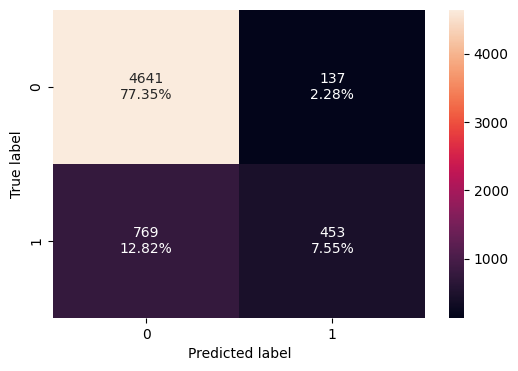

In [84]:
make_confusion_matrix(y_train, y_train_pred)

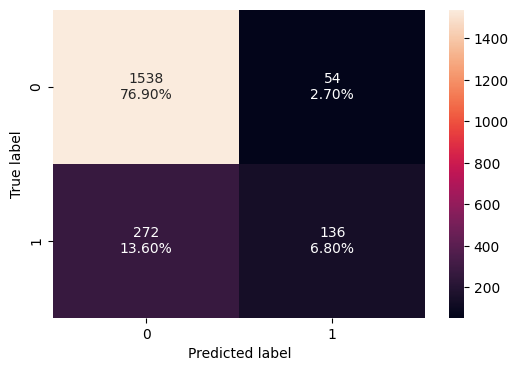

In [85]:
make_confusion_matrix(y_val, y_val_pred)


##### **Classification Report**

In [86]:
#lassification report for train
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      4778
           1       0.77      0.37      0.50      1222

    accuracy                           0.85      6000
   macro avg       0.81      0.67      0.71      6000
weighted avg       0.84      0.85      0.83      6000



In [87]:
#lassification report for val set
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1592
           1       0.72      0.33      0.45       408

    accuracy                           0.84      2000
   macro avg       0.78      0.65      0.68      2000
weighted avg       0.82      0.84      0.81      2000



#### **Observations Model 0**

Train F1 score of ~0.82 and Validation F1 score of ~0.81 indicate consistent performance of the model between training and Validation datasets.

Train Recall score of ~0.84 and Validation F1 score of ~0.83 indicate consistent performance of the model between training and Validation datasets.

Loss curve fortrain and val set is much smoother till epoch 15


#### Model 1 - **NN with Adam**

- The neural network consisting of
  - two hidden layers with 64 and 32 neurons respectively
  - activation function for hidden layers - ReLU.
  - Output layer with 1 node
  - Output Activation Function as Sigmoid
  - Output loss function as Binary Cross Entropy
  - Adam as the optimizer

##### **Neural Network with Adam Optimizer**

In [88]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [89]:
#Initializing the neural network
model1 = Sequential()
# Adding the first hidden layer with 64 neurons and relu as activation function
model1.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
# Adding the second hidden layer with 32 neurons and relu as activation function
model1.add(Dense(32, activation='relu'))
# Adding the output layer with 1 neurons and Sigmoid as activation function
model1.add(Dense(1, activation = 'sigmoid'))

In [90]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
#use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()
metrics = keras.metrics.Accuracy()   # Using Accuracy as metric

In [92]:
## compile the model with binary cross entropy as loss function and accuracy as the metric.
model1.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=[metrics])

In [93]:
# Fitting the model
start = time.time()
history1 = model1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0000e+00 - loss: 0.5621 - val_accuracy: 0.0000e+00 - val_loss: 0.4225
Epoch 2/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.4213 - val_accuracy: 0.0000e+00 - val_loss: 0.3937
Epoch 3/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 0.3873 - val_accuracy: 0.0000e+00 - val_loss: 0.3711
Epoch 4/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.3634 - val_accuracy: 0.0000e+00 - val_loss: 0.3606
Epoch 5/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.3517 - val_accuracy: 0.0000e+00 - val_loss: 0.3567
Epoch 6/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.3452 - val_accuracy: 0.0000e+00 - val_loss: 0.3551
Epoch 7/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.3408 - val_accuracy: 0.0000e+00 - val_loss: 0.3546
Epoch 8/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

In [94]:
print("Time taken in seconds ",end-start)

Time taken in seconds  10.633369445800781


##### **Loss Function**

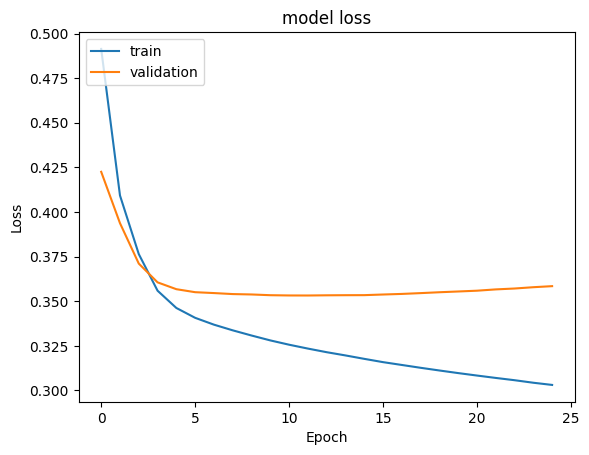

In [95]:
#Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

##### **Performance**

In [96]:
model1_train_perf = model_performance_classification(model1, X_train, y_train)
model1_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8755,0.8755,0.868695,0.866151


In [97]:
model1_valid_perf = model_performance_classification(model1, X_val, y_val)
model1_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.851,0.851,0.839289,0.839152


In [98]:
#Predicting the results using best as a threshold for train set
y_train_pred = model1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [99]:
#Predicting the results using best as a threshold for Val set
y_val_pred = model1.predict(X_val)    ## make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [100]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

##### **Classification Report**

In [101]:
#lassification report for train
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      4778
           1       0.79      0.54      0.64      1222

    accuracy                           0.88      6000
   macro avg       0.84      0.75      0.78      6000
weighted avg       0.87      0.88      0.87      6000



In [102]:
#lassification report for val set
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1592
           1       0.70      0.47      0.56       408

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



##### **Confusion Matrix**

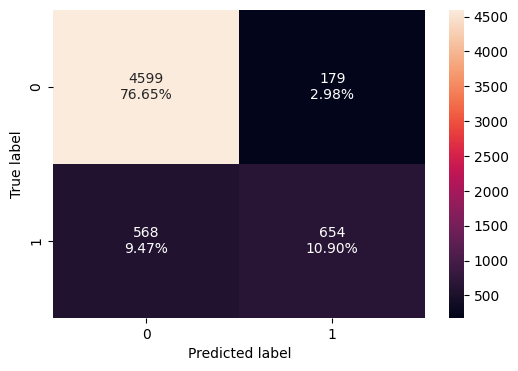

In [103]:
make_confusion_matrix(y_train, y_train_pred)

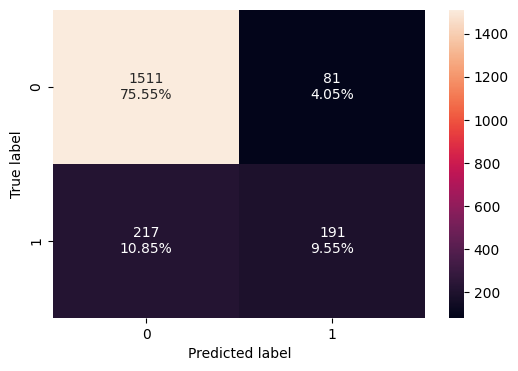

In [104]:
make_confusion_matrix(y_val, y_val_pred)    ## check the model's performance on the validation set


#### **Observations on Model 1**

Train F1 score of ~0.86 and Validation F1 score of ~0.83 inceased the difference between sets

Train Recall score of ~0.87 and Validation F1 score of ~0.85 indicate consistent performance of the model

As expected, there is a improvement in the train scores.

The Difference between train and val set is increased

Loss curve is not smooth with train after epoch 5 only

#### Model 2 - **NN with Adam and Dropout**

- The neural network consisting of
  - two hidden layers with 64 and 32 neurons respectively
  - activation function for hidden layers - ReLU.
  - Output layer with 1 node
  - Output Activation Function as Sigmoid
  - Output loss function as Binary Cross Entropy
  - Dropout as Regularization technique
  - Adam as the optimizer


##### **Neural Network with Adam Optimizer and Dropout**

In [105]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [106]:
#Initializing the neural network
model2 = Sequential()
# Adding the first hidden layer with 64 neurons and relu as activation function
model2.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model2.add(Dropout(0.4)) # Dropout of 40% Neurons
# Adding the second hidden layer with 32 neurons and relu as activation function
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.2)) # Dropout of 20% Neurons
# Adding the output layer with 1 neurons and Sigmoid as activation function
model2.add(Dense(1, activation = 'sigmoid'))

In [107]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [108]:
#use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()
metrics = keras.metrics.Accuracy()   # Using Accuracy as metric

In [109]:
## compile the model with binary cross entropy as loss function and accuracy as the metric.
model2.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=[metrics])

In [110]:
# Fitting the model
start = time.time()
history2 = model2.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0000e+00 - loss: 0.6501 - val_accuracy: 0.0000e+00 - val_loss: 0.4385
Epoch 2/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4562 - val_accuracy: 0.0000e+00 - val_loss: 0.4154
Epoch 3/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4281 - val_accuracy: 0.0000e+00 - val_loss: 0.4032
Epoch 4/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4223 - val_accuracy: 0.0000e+00 - val_loss: 0.3935
Epoch 5/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4117 - val_accuracy: 0.0000e+00 - val_loss: 0.3844
Epoch 6/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.3952 - val_accuracy: 0.0000e+00 - val_loss: 0.3762
Epoch 7/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.3959 - val_accuracy: 0.0000e+00 - val_loss: 0.3679
Epoch 8/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

In [111]:
print("Time taken in seconds ",end-start)

Time taken in seconds  15.623424291610718


##### **Loss Function**

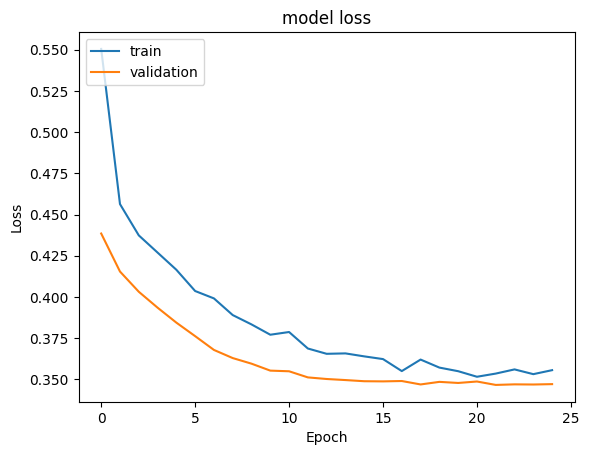

In [112]:
#Plotting Train Loss vs Validation Loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

##### **Performance**

In [113]:
model2_train_perf = model_performance_classification(model2, X_train, y_train)
model2_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.864667,0.864667,0.862017,0.845702


In [114]:
model2_valid_perf = model_performance_classification(model2, X_val, y_val)
model2_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.857,0.857,0.851621,0.836367


In [115]:
#Predicting the results using best as a threshold for train set
y_train_pred = model2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [116]:
#Predicting the results using best as a threshold for Val set
y_val_pred = model2.predict(X_val)    ## make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [117]:
model_name = "NN with Adam and Dropout"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

##### **Confusion Matrix**

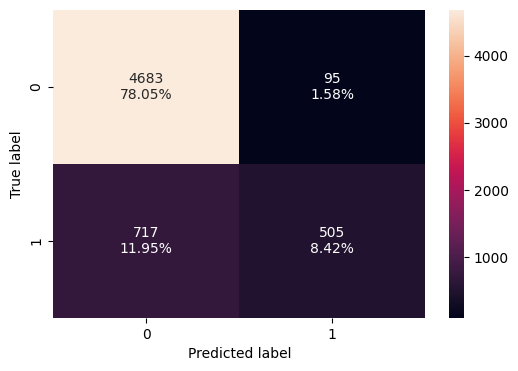

In [118]:
make_confusion_matrix(y_train, y_train_pred)

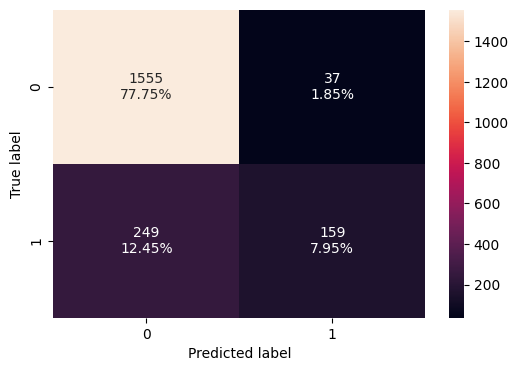

In [119]:
make_confusion_matrix(y_val, y_val_pred)    ## check the model's performance on the validation set


##### **Classification Report**

In [120]:
#lassification report for train
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      4778
           1       0.84      0.41      0.55      1222

    accuracy                           0.86      6000
   macro avg       0.85      0.70      0.74      6000
weighted avg       0.86      0.86      0.85      6000



In [121]:
#lassification report for val set
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1592
           1       0.81      0.39      0.53       408

    accuracy                           0.86      2000
   macro avg       0.84      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000



#### **Observations on Model 2**

Train F1 score of ~0.84 and Validation F1 score of ~0.83 indicate consistent performance of the model between training and Validation datasets.

Train Recall score of ~0.86 and Validation F1 score of ~0.85 indicate consistent performance of the model between training and Validation datasets.

The difference between train and val test is reduced

Rate of improvement is smooth over epochs for loss curve

#### Model 3 - **NN with Adam and Batch Normalization**

- Let's start with a neural network consisting of
  - two hidden layers with 64 and 32 neurons respectively
  - activation function for hidden layers - ReLU.
  - Output layer with 1 node
  - Output Activation Function as Sigmoid
  - Output loss function as Binary Cross Entropy
  - Adam as the optimizer
  - Batch Normalization


##### **Neural Network with Adam Optimizer and Batch Normalization**

In [122]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [123]:
#Initializing the neural network
model3 = Sequential()

model3.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model3.add(BatchNormalization())
model3.add(Dense(32, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(1, activation = 'sigmoid'))

In [124]:
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 192 (768.00 B)

In [125]:
#use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()
metrics = keras.metrics.Accuracy()   # Using Accuracy as metric

In [126]:
## compile the model with binary cross entropy as loss function and accuracy as the metric.
model3.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=[metrics])

In [127]:
# Fitting the model
start = time.time()
history3 = model3.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0000e+00 - loss: 0.7017 - val_accuracy: 0.0000e+00 - val_loss: 0.4506
Epoch 2/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4305 - val_accuracy: 0.0000e+00 - val_loss: 0.3892
Epoch 3/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.3700 - val_accuracy: 0.0000e+00 - val_loss: 0.3655
Epoch 4/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.3477 - val_accuracy: 0.0000e+00 - val_loss: 0.3592
Epoch 5/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.3366 - val_accuracy: 0.0000e+00 - val_loss: 0.3572
Epoch 6/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.3281 - val_accuracy: 0.0000e+00 - val_loss: 0.3552
Epoch 7/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.3209 - val_accuracy: 0.0000e+00 - val_loss: 0.3543
Epoch 8/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

In [128]:
print("Time taken in seconds ",end-start)

Time taken in seconds  13.140207767486572


##### **Loss Function**

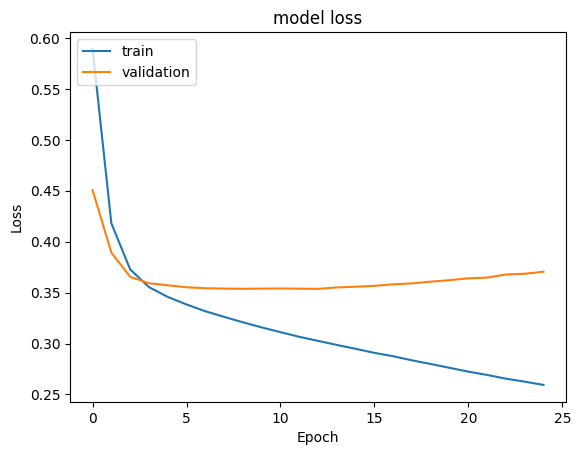

In [129]:
#Plotting Train Loss vs Validation Loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

##### **Performance**

In [130]:
model3_train_perf = model_performance_classification(model3, X_train, y_train)
model3_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.883833,0.883833,0.878412,0.87928


In [131]:
model3_valid_perf = model_performance_classification(model3, X_val, y_val)
model3_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.843,0.843,0.835024,0.837866


In [132]:
#Predicting the results using best as a threshold for train set
y_train_pred = model3.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [133]:
#Predicting the results using best as a threshold for Val set
y_val_pred = model3.predict(X_val)    ## make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [134]:
model_name = "NN with Adam and Batch Normalization"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

##### **Classification Report**

In [135]:
#lassification report for train
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4778
           1       0.76      0.62      0.69      1222

    accuracy                           0.88      6000
   macro avg       0.84      0.79      0.81      6000
weighted avg       0.88      0.88      0.88      6000



In [136]:
#lassification report for val set
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1592
           1       0.64      0.54      0.58       408

    accuracy                           0.84      2000
   macro avg       0.76      0.73      0.74      2000
weighted avg       0.84      0.84      0.84      2000



##### **Confusion Matrix**

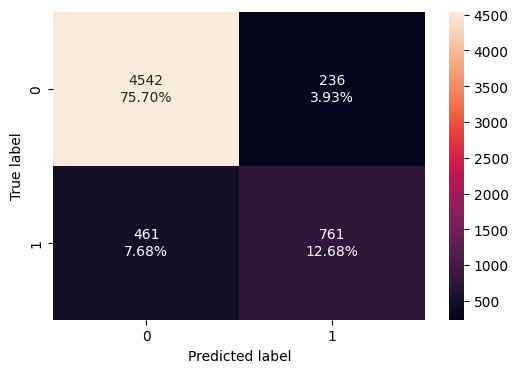

In [137]:
make_confusion_matrix(y_train, y_train_pred)

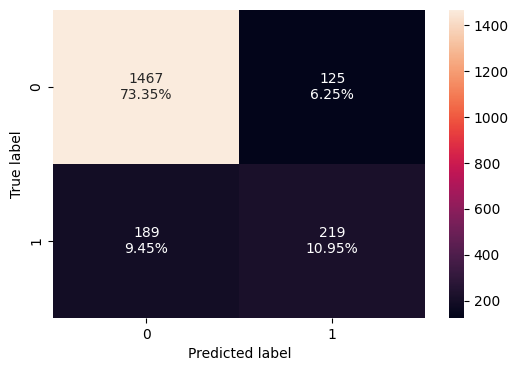

In [138]:
make_confusion_matrix(y_val, y_val_pred)    ## check the model's performance on the validation set


#### **Observations on Model 3**

Train F1 score of ~0.88 and Validation F1 score of ~0.84 - increased differnece between train and val set

Train Recall score of ~0.88 and Validation F1 score of ~0.84 -
increased differnece between train and val set

Difference between train and val set is increased

Model performed better with batch normalization

#### Model 4 - **NN with SMOTE and SGD**


- The neural network consisting of
  - two hidden layers with 64 and 32 neurons respectively
  - activation function for hidden layers - ReLU.
  - Output layer with 1 node
  - Output Activation Function as Sigmoid
  - Output loss function as Binary Cross Entropy
  - SGD as the optimizer


##### **Neural Network with Balanced Data (SMOTE) and SGD Optimizer**

In [139]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [140]:
#Initializing the neural network
model4 = Sequential()
# Adding the first hidden layer with 64 neurons and relu as activation function
model4.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
# Adding the second hidden layer with 32 neurons and relu as activation function
model4.add(Dense(32, activation='relu'))
# Adding the output layer with 1 neurons and Sigmoid as activation function
model4.add(Dense(1, activation = 'sigmoid'))

In [141]:
model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [142]:
#use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD()
metrics = keras.metrics.Accuracy()   # Using Accuracy as metric

In [143]:
## ompile the model with binary cross entropy as loss function and accuracy as the metric.
model4.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=[metrics])

In [144]:
# Fitting the model
start = time.time()
history4 = model4.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0000e+00 - loss: 0.6864 - val_accuracy: 0.0000e+00 - val_loss: 0.6292
Epoch 2/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6172 - val_accuracy: 0.0000e+00 - val_loss: 0.5897
Epoch 3/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.5820 - val_accuracy: 0.0000e+00 - val_loss: 0.5680
Epoch 4/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.5624 - val_accuracy: 0.0000e+00 - val_loss: 0.5557
Epoch 5/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.5497 - val_accuracy: 0.0000e+00 - val_loss: 0.5466
Epoch 6/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.5398 - val_accuracy: 0.0000e+00 - val_loss: 0.5386
Epoch 7/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.5306 - val_accuracy: 0.0000e+00 - val_loss: 0.5310
Epoch 8/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

In [145]:
print("Time taken in seconds ",end-start)

Time taken in seconds  15.291436672210693


##### **Loss Function**

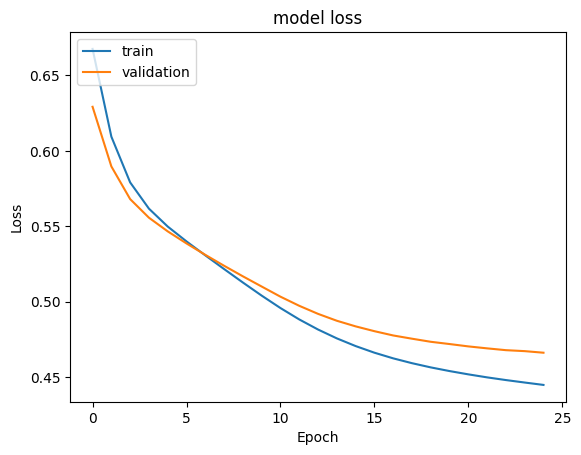

In [146]:
#Plotting Train Loss vs Validation Loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Loss is very less on Train and Validation set till Epoch 15 and then the error is higher on Val set



##### **Performance**

In [147]:
model4_train_perf = model_performance_classification(model4, X_train_over, y_train_over)
model4_train_perf

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.787882,0.787882,0.787882,0.787882


In [148]:
model4_valid_perf = model_performance_classification(model4, X_val, y_val)
model4_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.781,0.781,0.832423,0.796552


In [149]:
#Predicting the results using best as a threshold for train set
y_train_pred = model4.predict(X_train_over)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [150]:
#Predicting the results using best as a threshold for Val set
y_val_pred = model4.predict(X_val)    ## make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [151]:
model_name = "NN with SMOTE and SGD "

train_metric_df.loc[model_name] = recall_score(y_train_over, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

##### **Classification Report**

In [152]:
#lassification report for train
cr = classification_report(y_train_over, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      4778
           1       0.79      0.79      0.79      4778

    accuracy                           0.79      9556
   macro avg       0.79      0.79      0.79      9556
weighted avg       0.79      0.79      0.79      9556



In [153]:
#lassification report for val set
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1592
           1       0.48      0.75      0.58       408

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.78      0.80      2000



- The Neural network consisting of
  - two hidden layers with 64 and 32 neurons respectively
  - activation function for hidden layers - ReLU.
  - Output layer with 1 node
  - Output Activation Function as Sigmoid
  - Output loss function as Binary Cross Entropy
  - Dropout as Regularization technique
  - SGD as the optimizer
  - Training on Oversampled data (using SMOTE)


##### **Confusion Matrix**

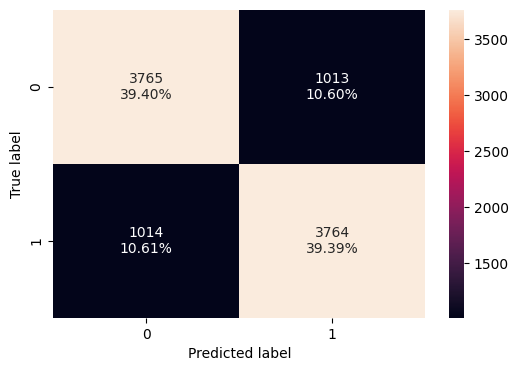

In [154]:
make_confusion_matrix(y_train_over, y_train_pred)

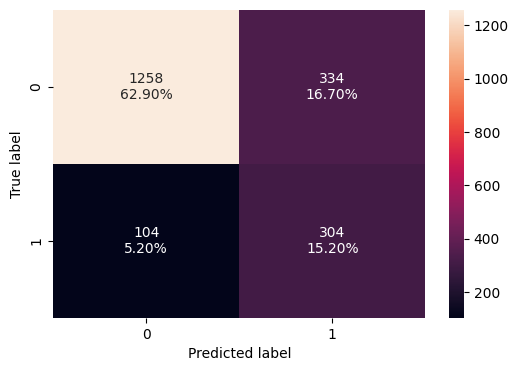

In [155]:
make_confusion_matrix(y_val, y_val_pred)    ## check the model's performance on the validation set


#### **Observations on Model 4**

The Overall recall score for train and val set is almost same ~79%

Difference between train and val set is almost negligible

Loss curve is smooth till epch 15

Infact Validation set is performing little better than train set on F1 score



#### Model 5 - **NN with SMOTE and Adam**

- The neural network consisting of
  - two hidden layers with 64 and 32 neurons respectively
  - activation function for hidden layers - ReLU.
  - Output layer with 1 node
  - Output Activation Function as Sigmoid
  - Output loss function as Binary Cross Entropy
  - Adam as the optimizer


##### **Neural Network with Balanced Data (SMOTE) and Adam Optimizer**

In [156]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [157]:
#Initializing the neural network
model5 = Sequential()
# Adding the first hidden layer with 64 neurons and relu as activation function
model5.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
# Adding the second hidden layer with 32 neurons and relu as activation function
model5.add(Dense(32, activation='relu'))
# Adding the output layer with 1 neurons and Sigmoid as activation function
model5.add(Dense(1, activation = 'sigmoid'))

In [158]:
model5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [159]:
#use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()
metrics = keras.metrics.Accuracy()   # Using Accuracy as metric

In [160]:
## compile the model with binary cross entropy as loss function and accuracy as the metric.
model5.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=[metrics])

In [161]:
# Fitting the model
start = time.time()
history5 = model5.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0000e+00 - loss: 0.6079 - val_accuracy: 0.0000e+00 - val_loss: 0.5174
Epoch 2/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.4886 - val_accuracy: 0.0000e+00 - val_loss: 0.4819
Epoch 3/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4540 - val_accuracy: 0.0000e+00 - val_loss: 0.4712
Epoch 4/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4399 - val_accuracy: 0.0000e+00 - val_loss: 0.4661
Epoch 5/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4299 - val_accuracy: 0.0000e+00 - val_loss: 0.4649
Epoch 6/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4218 - val_accuracy: 0.0000e+00 - val_loss: 0.4626
Epoch 7/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4149 - val_accuracy: 0.0000e+00 - val_loss: 0.4608
Epoch 8/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

In [162]:
print("Time taken in seconds ",end-start)

Time taken in seconds  16.848300218582153


##### **Loss Function**

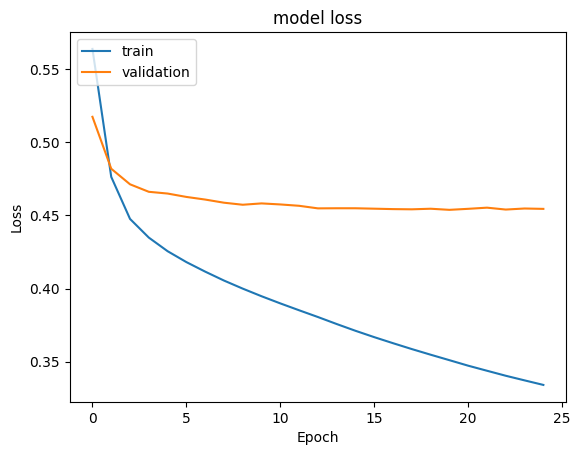

In [163]:
#Plotting Train Loss vs Validation Loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

There is a significant noise on validation test and error between train and val set is very high.

Oversampling has not train the data well in a better way with Adam optimizer

##### **Performance**

In [164]:
model5_train_perf = model_performance_classification(model5, X_train_over, y_train_over)
model5_train_perf

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.856844,0.856844,0.857421,0.856786


In [165]:
model5_valid_perf = model_performance_classification(model5, X_val, y_val)
model5_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7955,0.7955,0.829769,0.80711


In [166]:
#Predicting the results using best as a threshold for train set
y_train_pred = model5.predict(X_train_over)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [167]:
#Predicting the results using best as a threshold for Val set
y_val_pred = model5.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [168]:
model_name = "NN with with SMOTE and Adam "

train_metric_df.loc[model_name] = recall_score(y_train_over, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

##### Classification Report

In [169]:
#lassification report for train
cr = classification_report(y_train_over, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4778
           1       0.84      0.88      0.86      4778

    accuracy                           0.86      9556
   macro avg       0.86      0.86      0.86      9556
weighted avg       0.86      0.86      0.86      9556



In [170]:
#lassification report for val set
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1592
           1       0.50      0.70      0.58       408

    accuracy                           0.80      2000
   macro avg       0.71      0.76      0.72      2000
weighted avg       0.83      0.80      0.81      2000



##### **Confusion Matrix**

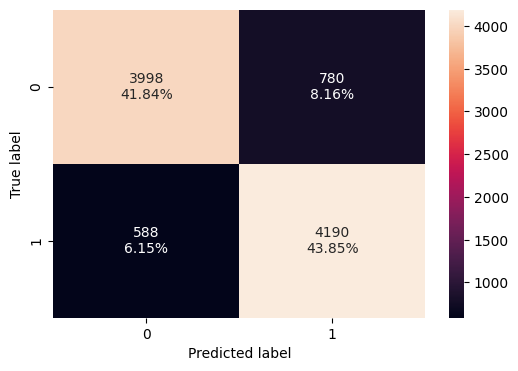

In [171]:
make_confusion_matrix(y_train_over, y_train_pred)   # Check Performance on train set

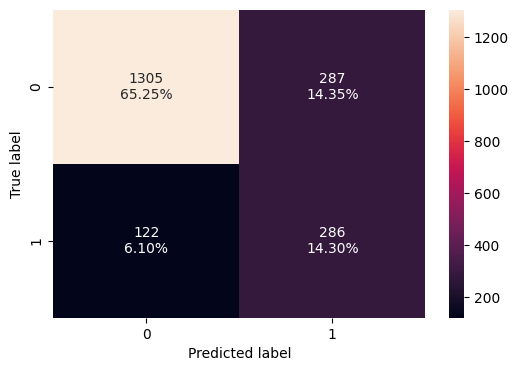

In [172]:
make_confusion_matrix(y_val, y_val_pred)    # Check Performance on Val set


#### **Observations on Model 5**

Training the model using Oversample data and Adam Optimizer does not improve the model

Train F1 score of ~0.85 and Validation F1 score of ~0.80

Train Recall score of ~0.85 and Validation recall score of ~0.79 indicate consistent performance of the model between training and Validation datasets.

The loss curve is constant for val set after epoch 5

#### Model 6 - **NN with SMOTE, Adam & Dropout**

- The Neural network consisting of
  - two hidden layers with 64 and 32 neurons respectively
  - activation function for hidden layers - ReLU.
  - Output layer with 1 node
  - Output Activation Function as Sigmoid
  - Output loss function as Binary Cross Entropy
  - Dropout as Regularization technique
  - Adam as the optimizer
  - Training on Oversampled data (using SMOTE)


##### **Neural Network with Balanced Data (SMOTE) and Adam Optimizer**

In [173]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [174]:
#Initializing the neural network
model6 = Sequential()
# Adding the first hidden layer with 64 neurons and relu as activation function
model6.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model6.add(Dropout(0.4))
# Adding the second hidden layer with 32 neurons and relu as activation function
model6.add(Dense(32, activation='relu'))
model6.add(Dropout(0.2))
# Adding the output layer with 1 neurons and Sigmoid as activation function
model6.add(Dense(1, activation = 'sigmoid'))

In [175]:
model6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [176]:
#use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()
metrics = keras.metrics.Accuracy()   # Using Accuracy as metric

In [177]:
## compile the model with binary cross entropy as loss function and accuracy as the metric.
model6.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=[metrics])

In [178]:
# Fitting the model
start = time.time()
history6 = model6.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0000e+00 - loss: 0.6731 - val_accuracy: 0.0000e+00 - val_loss: 0.5146
Epoch 2/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0000e+00 - loss: 0.5625 - val_accuracy: 0.0000e+00 - val_loss: 0.4876
Epoch 3/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.5305 - val_accuracy: 0.0000e+00 - val_loss: 0.4664
Epoch 4/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.5066 - val_accuracy: 0.0000e+00 - val_loss: 0.4579
Epoch 5/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.5001 - val_accuracy: 0.0000e+00 - val_loss: 0.4522
Epoch 6/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.4923 - val_accuracy: 0.0000e+00 - val_loss: 0.4419
Epoch 7/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 5.3480e-05 - loss: 0.4816 - val_accuracy: 0.0000e+00 - val_loss: 0.4426
Epoch 8/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

In [179]:
print("Time taken in seconds ",end-start)

Time taken in seconds  19.653945922851562


##### **Loss Function**

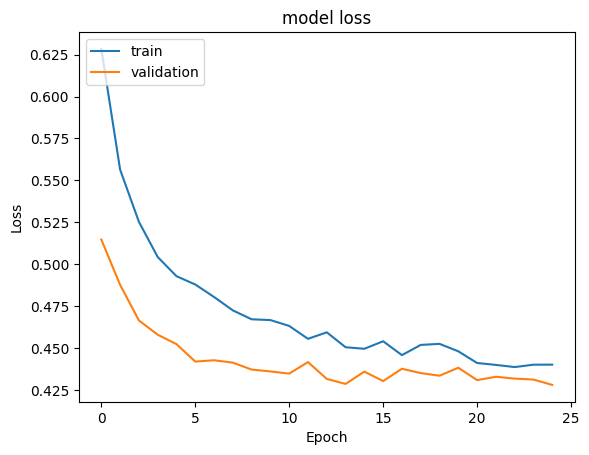

In [180]:
#Plotting Train Loss vs Validation Loss
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

##### **Performance**

In [181]:
model6_train_perf = model_performance_classification(model6, X_train_over, y_train_over)
model6_train_perf

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.812055,0.812055,0.813938,0.811773


In [182]:
model6_valid_perf = model_performance_classification(model6, X_val, y_val)
model6_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8115,0.8115,0.834713,0.819948


In [183]:
#Predicting the results using best as a threshold for train set
y_train_pred = model6.predict(X_train_over)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [184]:
#Predicting the results using best as a threshold for Val set
y_val_pred = model6.predict(X_val)    ## make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [185]:
model_name = "NN with with SMOTE, Adam and Dropout "

train_metric_df.loc[model_name] = recall_score(y_train_over, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

##### Classification Report

In [186]:
#lassification report for train
cr = classification_report(y_train_over, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      4778
           1       0.84      0.77      0.80      4778

    accuracy                           0.81      9556
   macro avg       0.81      0.81      0.81      9556
weighted avg       0.81      0.81      0.81      9556



In [187]:
#lassification report for val set
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.84      0.88      1592
           1       0.53      0.69      0.60       408

    accuracy                           0.81      2000
   macro avg       0.72      0.76      0.74      2000
weighted avg       0.83      0.81      0.82      2000



##### **Confusion Matrix**

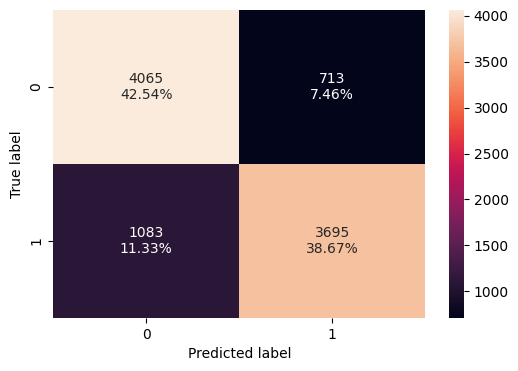

In [188]:
make_confusion_matrix(y_train_over, y_train_pred)

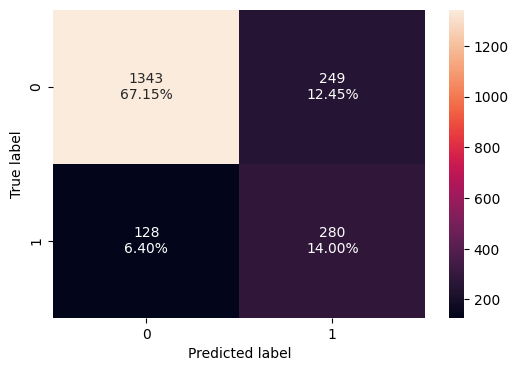

In [189]:
make_confusion_matrix(y_val, y_val_pred)    ## check the model's performance on the validation set


#### **Observations on Model 6**

Train F1 score of ~0.81 and Validation F1 score of ~0.81 indicates consistent performance

Train Recall score of ~0.81 and Validation recall score of ~0.81 indicate consistent performance

Difference between train and val set is almost negligible

The loss curve in train set and Val set is very close after epoch 20 and is much smoother


#### Model 7 - **NN with SGD and he weights**

- Let's start with a neural network consisting of
  - Four hidden layers with 64 and 32 neurons respectively
  - activation function for hidden layers - ReLU.
  - Output layer with 1 node
  - Output Activation Function as Sigmoid
  - Output loss function as Binary Cross Entropy
  - SGD as the optimizer
  - He initialization

##### **Neural Network with SGD Optimizer**

In [190]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [191]:
#Initializing the neural network
model7 = Sequential()
# Adding the first hidden layer with 128 neurons and relu as activation function
model7.add(Dense(64, activation='relu', input_dim=X_train.shape[1],kernel_initializer='he_uniform'))
model7.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model7.add(Dense(1, activation = 'sigmoid', kernel_initializer='he_uniform'))

In [192]:
model7.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [193]:
#use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

In [194]:
## compile the model with binary cross entropy as loss function and accuracy as the metric.
model7.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [195]:
# Fitting the model
start = time.time()
history7 = model7.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5569 - loss: 0.7582 - val_accuracy: 0.6855 - val_loss: 0.6102
Epoch 2/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6965 - loss: 0.6007 - val_accuracy: 0.7455 - val_loss: 0.5565
Epoch 3/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7537 - loss: 0.5534 - val_accuracy: 0.7745 - val_loss: 0.5319
Epoch 4/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7722 - loss: 0.5301 - val_accuracy: 0.7820 - val_loss: 0.5157
Epoch 5/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7838 - loss: 0.5144 - val_accuracy: 0.7845 - val_loss: 0.5036
Epoch 6/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7916 - loss: 0.5025 - val_accuracy: 0.7875 - val_loss: 0.4940
Epoch 7/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7929 - loss: 0.4932 - val_accuracy: 0.7930 - val_loss: 0.4863
Epoch 8/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7961 - loss: 0.4856 - val_accuracy: 0.

In [196]:
print("Time taken in seconds ",end-start)

Time taken in seconds  8.884931325912476


##### **Loss Function**

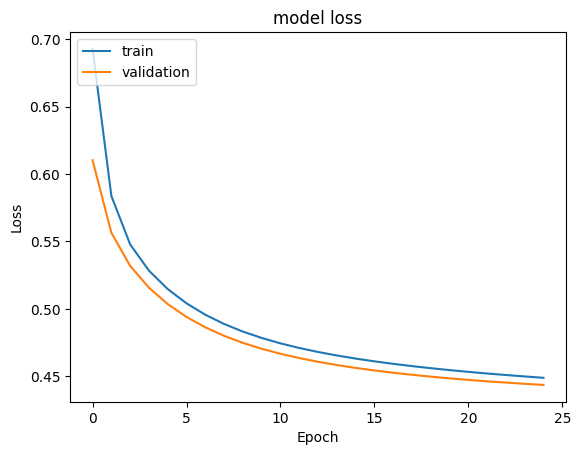

In [197]:
#Plotting Train Loss vs Validation Loss
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

##### **Performance**

In [198]:
model7_train_perf = model_performance_classification(model7, X_train, y_train)
model7_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.812,0.812,0.783294,0.778497


In [199]:
model7_valid_perf = model_performance_classification(model7, X_val, y_val)
model7_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8085,0.8085,0.777024,0.770726


In [200]:
#Predicting the results using best as a threshold for train set
y_train_pred = model7.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [201]:
#Predicting the results using best as a threshold for Val set
y_val_pred = model7.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [202]:
model_name = "NN with SGD and weights"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

##### **Confusion Matrix**

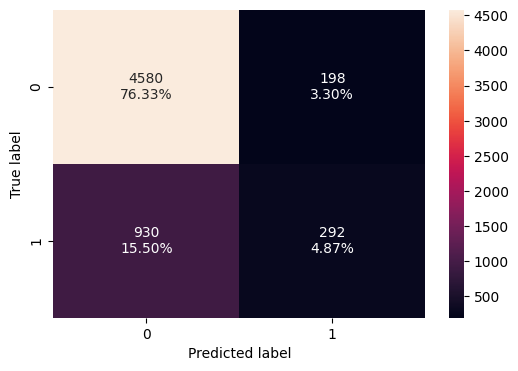

In [203]:
make_confusion_matrix(y_train, y_train_pred)

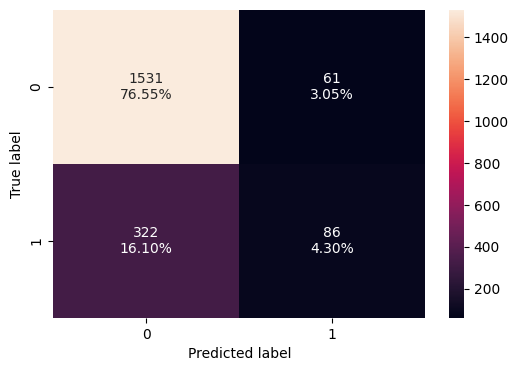

In [204]:
make_confusion_matrix(y_val, y_val_pred)


##### **Classification Report**

In [205]:
#lassification report for train
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4778
           1       0.60      0.24      0.34      1222

    accuracy                           0.81      6000
   macro avg       0.71      0.60      0.62      6000
weighted avg       0.78      0.81      0.78      6000



In [206]:
#lassification report for val set
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1592
           1       0.59      0.21      0.31       408

    accuracy                           0.81      2000
   macro avg       0.71      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000



#### **Observations on Model 7**

Train F1 score of ~0.77 and Validation F1 score of ~0.76 indicate consistent performance of the model between training and Validation datasets.

Train Recall score of ~0.81 and Validation recall score of ~0.81 indicate consistent performance of the model between training and Validation datasets.

Difference between train and val set is almost negligible

Recall Score reduced with He weights

The loss curve in train set and Val set is very close and much smoother


## Model Performance Improvement

## Model Performance Comparison and Final Model Selection

In [207]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model0_train_perf.T,
        model1_train_perf.T,
        model2_train_perf.T,
        model3_train_perf.T,
        model4_train_perf.T,
        model5_train_perf.T,
        model6_train_perf.T,
        model7_train_perf.T

    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",         # model with SGD optimizer
    "Neural Network (Adam , No Regularization)",       # model with Adam optimizer
    "Neural Network (Adam, dropout [0.4,0.2])",        # model with Adam optimizer and Dropout
    "Neural Network (Adam, Batch Normalization)",      # model with Adam optimizer and Batch Normalixation -
    "Neural Network (SGD, SMOTE, No Regularization)",  # model with balanced data by applying SMOTE and SGD optimizer
    "Neural Network (Adam, SMOTE, No Regularization)", # model with balanced data by applying SMOTE and Adam optimizer
    "Neural Network (Adam, SMOTE, Dropout)",           # model with balanced data by applying SMOTE, Adam optimizer and Dropout
    "Neural Network (SGD ,He Weights)"                 # DD -
]

In [208]:
# Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model0_valid_perf.T,
        model1_valid_perf.T,
        model2_valid_perf.T,
        model3_valid_perf.T,
        model4_valid_perf.T,
        model5_valid_perf.T,
        model6_valid_perf.T,
        model7_valid_perf.T

    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",         # model with SGD optimizer
    "Neural Network (Adam , No Regularization)",       # model with Adam optimizer
    "Neural Network (Adam, dropout [0.4,0.2])",        # model with Adam optimizer and Dropout
    "Neural Network (Adam, Batch Normalization)",      # model with Adam optimizer and Batch Normalixation -
    "Neural Network (SGD, SMOTE, No Regularization)",  # model with balanced data by applying SMOTE and SGD optimizer
    "Neural Network (Adam, SMOTE, No Regularization)", # model with balanced data by applying SMOTE and Adam optimizer
    "Neural Network (Adam, SMOTE, Dropout)",           # model with balanced data by applying SMOTE, Adam optimizer and Dropout
    "Neural Network (SGD ,He Weights)"                 # DD -
]

In [209]:
models_train_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (Adam , No Regularization)","Neural Network (Adam, dropout [0.4,0.2])","Neural Network (Adam, Batch Normalization)","Neural Network (SGD, SMOTE, No Regularization)","Neural Network (Adam, SMOTE, No Regularization)","Neural Network (Adam, SMOTE, Dropout)","Neural Network (SGD ,He Weights)"
Accuracy,0.849000,0.875500,0.864667,0.883833,0.787882,0.856844,0.812055,0.812000
Recall,0.849000,0.875500,0.864667,0.883833,0.787882,0.856844,0.812055,0.812000
Precision,0.839514,0.868695,0.862017,0.878412,0.787882,0.857421,0.813938,0.783294
F1 Score,0.827350,0.866151,0.845702,0.879280,0.787882,0.856786,0.811773,0.778497


In [210]:
models_valid_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (Adam , No Regularization)","Neural Network (Adam, dropout [0.4,0.2])","Neural Network (Adam, Batch Normalization)","Neural Network (SGD, SMOTE, No Regularization)","Neural Network (Adam, SMOTE, No Regularization)","Neural Network (Adam, SMOTE, Dropout)","Neural Network (SGD ,He Weights)"
Accuracy,0.837000,0.851000,0.857000,0.843000,0.781000,0.795500,0.811500,0.808500
Recall,0.837000,0.851000,0.857000,0.843000,0.781000,0.795500,0.811500,0.808500
Precision,0.822401,0.839289,0.851621,0.835024,0.832423,0.829769,0.834713,0.777024
F1 Score,0.812512,0.839152,0.836367,0.837866,0.796552,0.807110,0.819948,0.770726


In [211]:
models_train_comp_df.loc["F1 Score"] - models_valid_comp_df.loc["F1 Score"]

,F1 Score
"Neural Network (SGD, No Regularization)",0.014838
"Neural Network (Adam , No Regularization)",0.027000
"Neural Network (Adam, dropout [0.4,0.2])",0.009334
"Neural Network (Adam, Batch Normalization)",0.041414
"Neural Network (SGD, SMOTE, No Regularization)",-0.008670
"Neural Network (Adam, SMOTE, No Regularization)",0.049676
"Neural Network (Adam, SMOTE, Dropout)",-0.008175
"Neural Network (SGD ,He Weights)",0.007771


In [212]:
models_train_comp_df.loc["Recall"] - models_valid_comp_df.loc["Recall"]

,Recall
"Neural Network (SGD, No Regularization)",0.012000
"Neural Network (Adam , No Regularization)",0.024500
"Neural Network (Adam, dropout [0.4,0.2])",0.007667
"Neural Network (Adam, Batch Normalization)",0.040833
"Neural Network (SGD, SMOTE, No Regularization)",0.006882
"Neural Network (Adam, SMOTE, No Regularization)",0.061344
"Neural Network (Adam, SMOTE, Dropout)",0.000555
"Neural Network (SGD ,He Weights)",0.003500


In [213]:
print("Train set performance comparison")
train_metric_df

Train set performance comparison


,recall
NN with SGD,0.370704
NN with Adam,0.535188
NN with Adam and Dropout,0.413257
NN with Adam and Batch Normalization,0.622750
NN with SMOTE and SGD,0.787777
NN with with SMOTE and Adam,0.876936
"NN with with SMOTE, Adam and Dropout",0.773336
NN with SGD and weights,0.238953


In [214]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.333333
NN with Adam,0.468137
NN with Adam and Dropout,0.389706
NN with Adam and Batch Normalization,0.536765
NN with SMOTE and SGD,0.745098
NN with with SMOTE and Adam,0.700980
"NN with with SMOTE, Adam and Dropout",0.686275
NN with SGD and weights,0.210784


In [215]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.037370
NN with Adam,0.067051
NN with Adam and Dropout,0.023551
NN with Adam and Batch Normalization,0.085985
NN with SMOTE and SGD,0.042679
NN with with SMOTE and Adam,0.175956
"NN with with SMOTE, Adam and Dropout",0.087062
NN with SGD and weights,0.028168


For the train model - **Neural Network (Adam, Batch Normalization)** performed better (recall score of 0.8855 and F1 score of 0.8816) than others followed by **Neural Network (Adam , No Regularization)** (recall score of 0.8755 and 0.8661) )as per **recall** and **F1 score**

For the Validation model - **Neural Network (Adam , No Regularization)** performed better (recall score of 0.8510 followed by **Neural Network (Adam, Batch Normalization)** (recall score of 0.8440

For F1 score best models are **Neural Network (Adam , No Regularization)** and **Neural Network (Adam, Batch Normalization)** Both having same F1 score of 0.839

Neural Network (SGD, SMOTE, No Regularization) and Neural Network (SGD ,He Weights) has least difference in terms of F1 score and recall score between train and val set

We will proceed with **Neural Network (Adam , No Regularization)** as final model

## Final Model

The Adam Optimizer shows less noise and less overfitting in the model.  

Neural Network (Adam , No Regularization) is our selected model to work with test unseen data

In [216]:
y_test_pred = model1.predict(X_test)
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [217]:
model1_test_perf = model_performance_classification(model1, X_test, y_test)
model1_test_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.862,0.862,0.852528,0.851591


In [218]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1593
           1       0.74      0.50      0.60       407

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



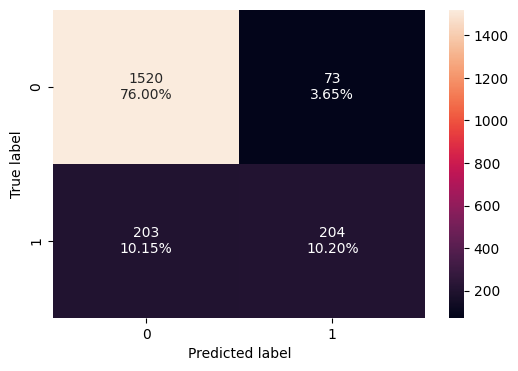

In [219]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

Test data performed well with recall score of 0.86 and F1 score of 0.85

## Actionable Insights and Business Recommendations

**Key Observations**

The Adam Optimizer shows less noise and less overfitting in the model, hence it is perferred over the SGD optimizer.

Neural Network (SGD, SMOTE, No Regularization) performed worst with 0.78 as recall score

The majority of model gave recall between 0.78 to 0.88

Utilizing the oversampled data introduced  noise in the validation dataset and the model  did not perform well for both optimizers (SGD and Adam)

As per EDA the dataset target classes are imbalanced.

Also as per EDA - the majority of features were poor predictors to decide on target variable

The best performing model is: Model01 (NN with Adam) followed by model03 (NN with Adam and Batch Normalization) which gives a recall of 0.87

As a result of data set fNN model with Adam Optimizer shows 0.86 recall score on test data which is pretty good based on how the train and val set performed






**Recommendations**

We would recomment (**NN with Adam Optimizer**) model to bank which will support the bank in identifying the customers who are willing to exit the bank.

Once Bank identifies the customer - neccessary action can be taken by the bank to retain those customers


<font size=6 color='blue'>Power Ahead</font>
___